<h1>Aplicación de Multilayer Perceptron en clasificación de dibujos hechos a mano usando el conjunto de imágenes QuickDraw - Aprendizaje Automático 1-2024</h1>

* <h5>Nombre: John Serrano Carrasco</h3>
* <h5>Profesora: Violeta Chang Camacho</h3>
* <h5>Ayudante: Bryan Salas Valenzuela</h3>

<h2>Breve Contexto</h2>
El objetivo de esta tarea es entender y aplicar redes neuronales para clasificar imágenes. Así, en esta tarea el foco estará en la clasificación de dibujos hechos a mano usando el conjunto de imágenes QuickDraw.  Para ello, se realizan experimetos usando Redes Neuronales, con dos subconjuntos "QuickDraw-10" y "QuickDraw-Animals". Se requiere:

1) Entrenar MLPi (i=1..3) usando QuickDraw-10. Se deben realizar al menos 5 entrenamientos/evaluaciones de cada MLPi (cada vez con pesos diferentes inicializados al azar)

2) Entrenar MLPi (i=1..3) usando QuickDraw-Animals. Se deben realizar al menos 5 entrenamientos/evaluaciones de cada MLPi (cada vez con pesos diferentes inicializados al azar)

3) Reportar la mediana de las 5 evaluaciones para cada MLPi y cada dataset.

Se deberán entrenar tres modelos de MLP bajo las siguientes características:

* Usar entre 2 y 4 capas ocultas. El tamaño de cada capa es decisión personal.
* Ocupar al menos 2 funciones de activación diferentes.
* Ocupar al menos 2 funciones de pérdida diferentes.
* Ocupar pesos inicializados al azar.

<h2>Orden y Metodología</h2>
En primer lugar, se definen tres modelos MLP, de dos, tres y cuatro capas, cada uno con configuraciones distintas. Por defecto, estos modelos tienen una configuración establecida (de acuerdo a los parametros de la función <b>createMLPX()</b> correspondiente) pero pueden utilizar distintas funciones de activación, función de perdida y número de neuronas. En cada experimento, los modelos MLP son entrenados y evaluados durante 5 iteraciones. En cada iteración se obtienen tres cosas: La accuracy total, la matriz de confusión asociada y las accuracy por clase (provenientes de la matriz de confusión obtenida). Estos elementos se agrupan y luego se obtiene la mediana de cada uno, permitiendo así obtener <b>la mediana de la accuracy total, la mediana de la matriz de confusión y la mediana de las accuracy por clase.</b> Luego de esto, se hacen las tablas y gráficos correspondientes. Al final de cada experimento, se realizan pruebas con cambios de hyperparametros, modificando las epochs y batch size de entrenamiento y las configuraciones de los modelos MLP.

<b>NOTA IMPORTANTE: Dada la restricción asociada al informe de "El informe debe ser un PDF de máximo 4 páginas" y en consecuencia, el (bastante) límitado espacio para colocar todo el analisis asociado a los resultados obtenidos y pruebas realizadas en el informe, es que algunas de las pruebas realizadas, especificamente los cambios de hyperparametros, se resumen muy brevemente en el informe, a pesar de la obtención de gráficos de barras y cambios en los resultados generales. Aún así, se intentó aprovechar el espacio lo más posible siempre teniendo en mente la pauta asociada y el enunciado.</b>

<h2>Importaciones de Librerias</h2>
Se importan todas las librerias necesarias para ejecutar los códigos a continuación.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from keras.utils import to_categorical
import random
from tensorflow.keras.regularizers import l1, l2, l1_l2

<h2>Definición de semilla</h2>
Se define una semilla para asegurar reproducibilidad y evitar aleatoriedad en los resultados. Para ello, se utiliza el número 159 como semilla y se define para el generador de números aleatorios de NumPy, para los operaciones aleatorias en TensorFlow y para el generador de números aleatorios de Python.

In [2]:
'''
Entrada: No tiene.
Salida: No tiene como tal, pero coloca una semilla (seed).
Descripción: Función que define una semilla (159) para asegurar reproducibilidad y evitar aleatoriedad en los resultados.
'''
def set_seed():
    np.random.seed(159)
    tf.random.set_seed(159)
    random.seed(159)

<h2>DEFINICIÓN DE MODELOS MLP</h2>

<h3>Modelo MLP 1:</h3>

* Una capa "Input" que convierte a las entradas (imágenes) en vectores de 1D.
* Una capa oculta de 128 neuronas usando la función de activación <b>ReLU.</b>
* Una capa oculta de 64 neuronas usando la función de activación <b>Sigmoid.</b>
* Se utiliza la fucnión de pérdida <b>Sparse Categorical Cross-Entropy.</b>
* La capa de salida utliza la función de activación <b>SoftMax</b> y su tamaño es el número de clases (10 en experimento 1, 12 en experimento 2).
* Se inicializa el modelo con <b>pesos al azar</b> cuando se utiliza Dense().

Para la creación de este modelo, se define la función <b>createMLP1()</b>. Nótese que por defecto, utiliza la configuración mencionada anteriormente, pero puede utilizar distintas funciones de activación, función de perdida y número de neuronas asociadas a las capas ocultas. El siguiente diagrama muestra la configuración por defecto del modelo.

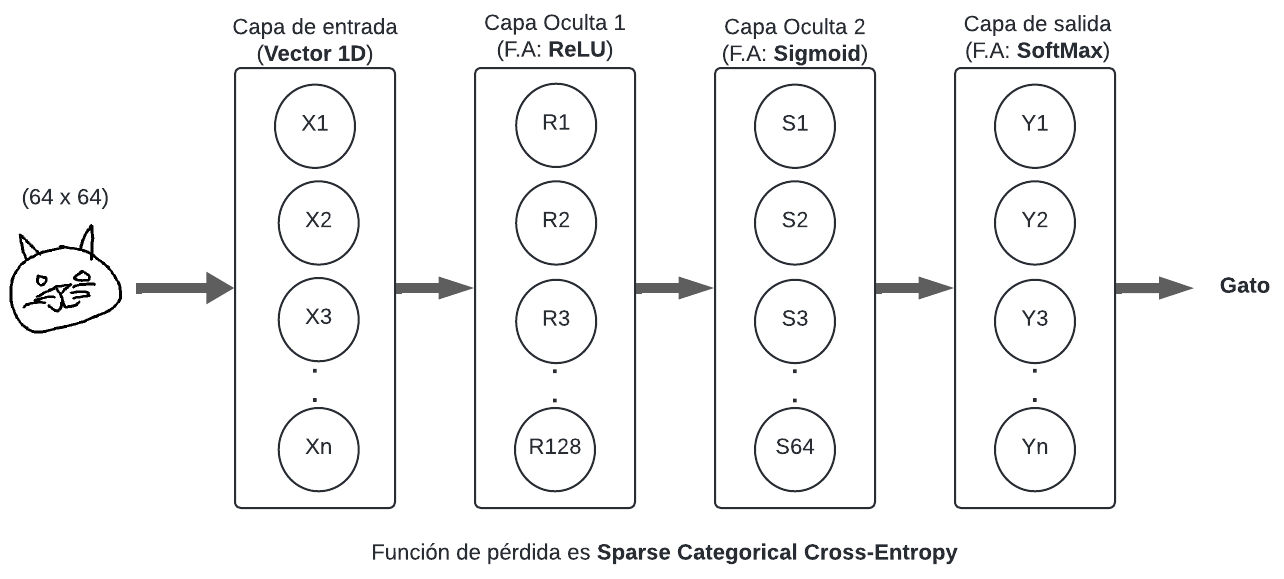

In [3]:
'''
Entradas: La forma de la entrada del modelo, el número de clases del problema, las funciones de activación, función de perdida y número de neuronas.
Salida: Un modelo MLP compilado y listo para el entrenamiento inicializado con pesos aleatorios.
Descripción: Define y compila un modelo MLP con una capa de entrada y dos capas ocultas. El modelo se inicializa con pesos aleatorios 
y usa la función de pérdida sparse_categorical_crossentropy (por defecto).
'''
def createMLP1(input_shape, num_classes, acts=['relu','sigmoid'], loss='sparse_categorical_crossentropy', num_neuronas=[128,64]):
    model = Sequential()
    model.add(Input(shape=input_shape)) # Capa de entrada
    model.add(Flatten())
    model.add(Dense(num_neuronas[0], activation=acts[0])) # Capa Oculta 1
    model.add(Dense(num_neuronas[1], activation=acts[1])) # Capa Oculta 2
    model.add(Dense(num_classes, activation='softmax')) # Capa final
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy']) # Función de perdida y compilación
    return model

<h3>Modelo MLP 2:</h3>

* Una capa "Input" que convierte a las entradas (imágenes) en vectores de 1D
* Una capa oculta de 256 neuronas usando la función de activación <b>ReLU.</b>
* Una capa oculta de 256 neuronas usando la función de activación <b>ReLU.</b>
* Una capa oculta de 256 neuronas usando la función de activación <b>ReLU.</b>
* Se utiliza la fucnión de pérdida <b>Categorical Cross-Entropy.</b>
* La capa de salida utliza la función de activación <b>SoftMax</b> y su tamaño es el número de clases (10 en experimento 1, 12 en experimento 2).
* Se inicializa el modelo con <b>pesos al azar.</b>

Para la creación de este modelo, se define la función <b>createMLP2()</b>. Nótese que por defecto, utiliza la configuración mencionada anteriormente, pero puede utilizar distintas funciones de activación, función de perdida y número de neuronas asociadas a las capas ocultas. El siguiente diagrama muestra la configuración por defecto del modelo.

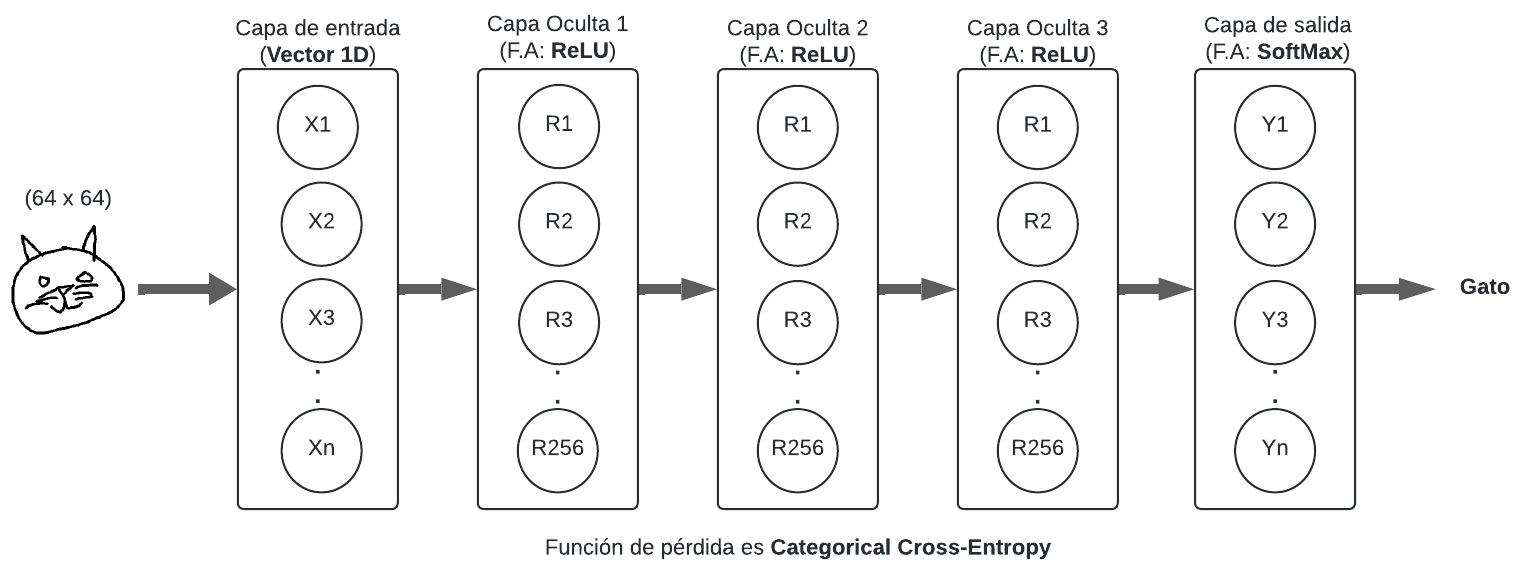

In [4]:
'''
Entradas:  La forma de la entrada del modelo, el número de clases del problema, las funciones de activación, función de perdida y número de neuronas.
Salida: Un modelo MLP compilado y listo para el entrenamiento inicializado con pesos aleatorios.
Descripción: Define y compila un modelo MLP con una capa de entrada y tres capas ocultas. El modelo se inicializa con pesos aleatorios 
y usa la función de pérdida categorical_crossentropy (por defecto).
'''
def createMLP2(input_shape, num_classes, acts=['relu','relu', 'relu'], loss='categorical_crossentropy', num_neuronas=[256, 256, 256]):
    model = Sequential()
    model.add(Input(shape=input_shape)) # Capa de entrada
    model.add(Flatten())
    model.add(Dense(num_neuronas[0], activation=acts[0])) # Capa Oculta 1
    model.add(Dense(num_neuronas[1], activation=acts[1])) # Capa Oculta 2
    model.add(Dense(num_neuronas[2], activation=acts[2])) # Capa Oculta 3
    model.add(Dense(num_classes, activation='softmax')) # Capa Final
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy']) # Función de perdida y compilación
    return model

<h3>Modelo MLP 3:</h3>

* Una capa "Input" que convierte a las entradas (imágenes) en vectores de 1D.
* Una capa oculta de 512 neuronas usando la función de activación <b>ReLU.</b>
* Una capa oculta de 256 neuronas usando la función de activación <b>ReLU.</b>
* Una capa oculta de 128 neuronas usando la función de activación <b>ReLU.</b>
* Una capa oculta de 64 neuronas usando la función de activación <b>ReLU.</b>
* Se utiliza la fucnión de perdida <b>Categorical Cross-Entropy.</b>
* La capa de salida utliza la función de activación <b>SoftMax</b> y tiene 10 neuronas (número de clases).
* Se inicializa el modelo con <b>pesos al azar.</b>

Para la creación de este modelo, se define la función <b>createMLP3()</b>. Nótese que por defecto, utiliza la configuración mencionada anteriormente, pero puede utilizar distintas funciones de activación, función de perdida y número de neuronas asociadas a las capas ocultas. El siguiente diagrama muestra la configuración por defecto del modelo.

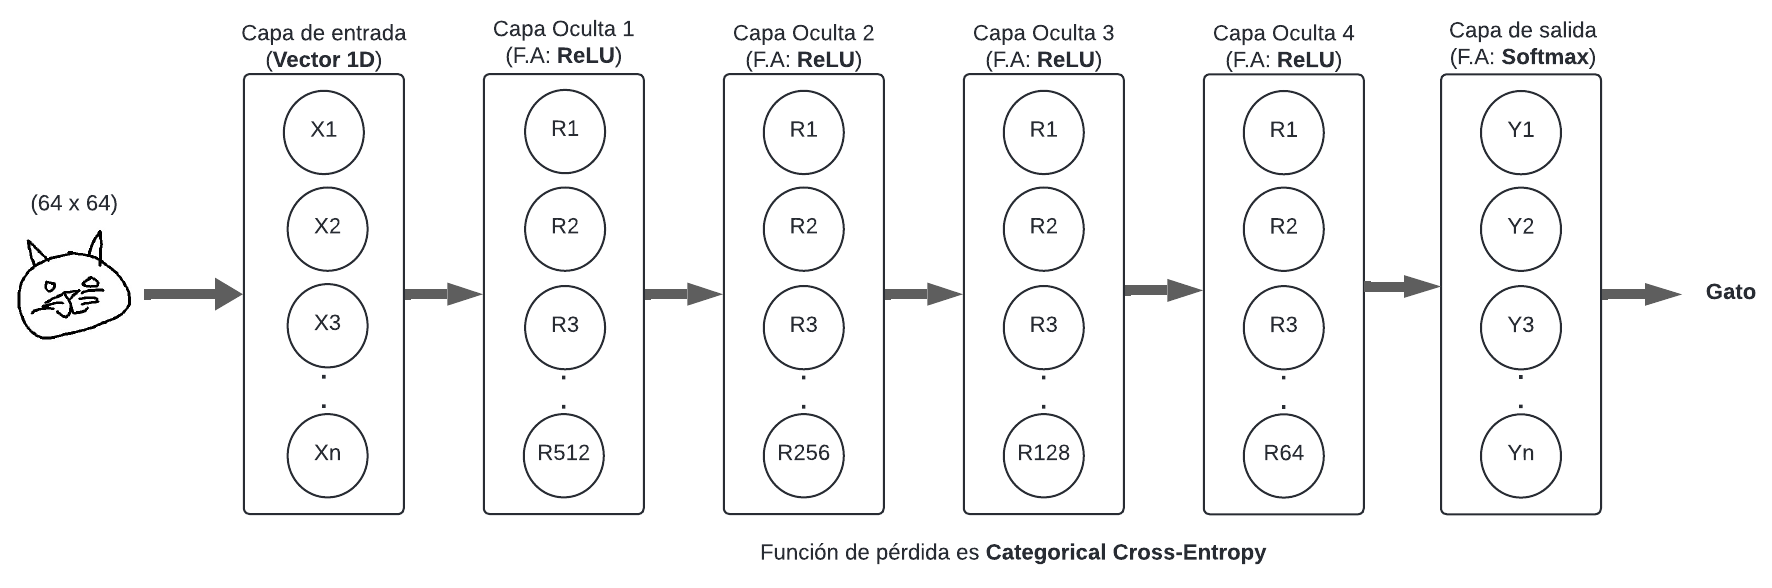

In [5]:
'''
Entradas: La forma de la entrada del modelo, el número de clases del problema, las funciones de activación, función de perdida y número de neuronas.
Salida: Un modelo MLP compilado y listo para el entrenamiento inicializado con pesos aleatorios.
Descripción:  Define y compila un modelo MLP con una capa de entrada y cuatro capas ocultas. El modelo se inicializa con pesos aleatorios 
y usa la función de pérdida categorical_crossentropy (por defecto).
'''
def createMLP3(input_shape, num_classes,  acts=['relu','relu', 'relu', 'relu'], loss='categorical_crossentropy', num_neuronas=[512, 256, 128, 64]):
    model = Sequential()
    model.add(Input(shape=input_shape)) # Capa de entrada
    model.add(Flatten())
    model.add(Dense(num_neuronas[0], activation=acts[0])) # Capa Oculta 1
    model.add(Dense(num_neuronas[1], activation=acts[1])) # Capa Oculta 2
    model.add(Dense(num_neuronas[2], activation=acts[2])) # Capa Oculta 3
    model.add(Dense(num_neuronas[3], activation=acts[3])) # Capa Oculta 4
    model.add(Dense(num_classes, activation='softmax')) # Capa Final
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy']) # Función de perdida y compilación
    return model

<h2>EXPERIMENTO 1: SUBCONJUNTO DE DATOS "QUICKDRAW-10"</h2>
El conjunto de datos QuickDraw-10 contiene 10 clases, las cuales son las siguientes clases:

* <b>sink:</b> Clase 0
* <b>castle:</b> Clase 1
* <b>lion:</b> Clase 2
* <b>teapot:</b> Clase 3
* <b>flashlight:</b> Clase 4
* <b>blackberry:</b> Clase 5
* <b>spreadsheet:</b> Clase 6
* <b>bandage:</b> Clase 7
* <b>remote-control:</b> Clase 8
* <b>trombone:</b> Clase 9

<h3>Lectura de datos del subconjunto de datos QuickDraw-10 </h3>

Se define la función <b>loadImages()</b> para cargar las imágenes y sus etiquetas correspondientes.

In [6]:
'''
Entradas: Un DataFrame que contiene las rutas de las imágenes y sus etiquetas, la ruta base donde se encuentran las imágenes y 
una tupla que especifica el tamaño al que se deben redimensionar las imágenes (por defecto, (64, 64))
Salidas: Un arreglo numpy de imágenes cargadas y redimensionadas y un arreglo numpy de etiquetas correspondientes a las imágenes.
Descripción: Función que carga imágenes desde rutas especificadas en un DataFrame, las redimensiona, convierte a arreglos numpy, 
y retorna estos arreglos junto con sus etiquetas correspondientes.
'''
def loadImages(data, base_path, target_size=(64, 64)):
    images = []
    labels = []
    for i, row in data.iterrows():
        # Se construye la ruta completa de la imagen uniendo la ruta base y la ruta específica de la imagen
        img_path = os.path.join(base_path, row['path'])
        # Se carga la imagen desde la ruta construida, redimensionándola al tamaño especificado (64x64)
        img = load_img(img_path, target_size=target_size, color_mode='grayscale')
        # Se convierte la imagen cargada en un arreglo numpy
        img_array = img_to_array(img)
        # Se añade el arreglo de la imagen a la lista 'images'
        images.append(img_array)
        # Se añade la etiqueta correspondiente a la lista 'labels'
        labels.append(row['label'])
    return np.array(images), np.array(labels)

Primero, se define la ruta base donde se encuentran los datos y se lee un archivo de mapeo que contiene las etiquetas de las clases y sus índices correspondientes, almacenándolos en un diccionario. Luego, lee los archivos train.txt y test.txt que contienen las rutas de las imágenes de entrenamiento y prueba junto con sus etiquetas, cargándolos en DataFrames. Se utiliza la función <b>loadImages()</b> para cargar cada imagen y convertirlas en arreglos numpy. Después, se cargan las imágenes y etiquetas de entrenamiento y prueba, y se normalizan los valores de los píxeles. Finalmente, se asegura que las etiquetas sean de tipo entero para ser utilizadas. Los datos de entrenamiento corresponden a 9834 imágenes y los datos de prueba son 1166 imágenes.

In [7]:
# Se define la ruta base de la ubicación de las carpeta Images y los archivos .txt de QuickDraw-10
base_path = "QuickDraw-10"

# Se leen el archivo mapping.txt
mapping_path = os.path.join(base_path, "mapping.txt")
mapping = pd.read_csv(mapping_path, sep='\t', header=None, names=['label', 'index'])
class_mapping = dict(zip(mapping['label'], mapping['index']))

# Se leen los archivos train.txt y test.txt
train_path = os.path.join(base_path, "train.txt")
test_path = os.path.join(base_path, "test.txt")
train_data = pd.read_csv(train_path, sep='\t', header=None, names=['path', 'label'])
test_data = pd.read_csv(test_path, sep='\t', header=None, names=['path', 'label'])

# Se realiza la carga de las imágenes de entrenamiento y prueba
X_train, y_train = loadImages(train_data, base_path)
X_test, y_test = loadImages(test_data, base_path)

# Se realiza la normalización de las imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0

# Se verifica que las etiquetas sean de tipo entero (Escencial para Sparse Categorical Cross-Entropy)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Se verifica que los datos se hayan cargado correctamente
print("Datos de entrenamiento cargados: ", X_train.shape)
print("Datos de prueba cargados: ", X_test.shape)

Datos de entrenamiento cargados:  (9834, 64, 64, 1)
Datos de prueba cargados:  (1166, 64, 64, 1)


<h3> Visualización de algunas de las imágenes obtenidas usando QuickDraw-10</h3>

Tras comprobar que se cargaron exitosamente las imágenes de entrenamiento y prueba, se crea la función <b>plotRandomImages()</b> para asi poder mostrar las imágenes obtenidas desde el conjunto de datos QuickDraw-10.

In [8]:
'''
Entradas: Un arreglo de numpy que contiene las imágenes, un arreglo de numpy que contiene las etiquetas y un diccionario que mapea 
las etiquetas a nombres de clases. También recibe el número de imágenes a mostrar, cuyo valor por defecto es 20.
Salida: No tiene salida como tal, pero muestra aleatoriamente imágenes usando matplotlib.
Descripción: Función que selecciona de manera aleatoria un conjunto de imágenes y las muestra en una figura, 
junto con sus etiquetas correspondientes.
'''
def plotRandomImages(images, labels, class_mapping, num_images=20):
    # Se utiliza la semilla para evitar aleatoriedad
    set_seed()
    # Se Seleccionan índices aleatorios de las imágenes sin reemplazo
    indices = np.random.choice(len(images), num_images, replace=False)
    # Se configura el tamaño de la figura para la visualización
    plt.figure(figsize=(20, 10))
    # Se itera sobre los índices seleccionados y se muestran las imágenes correspondientes
    for i, idx in enumerate(indices):
        # Se crea un subplot para cada imagen
        plt.subplot(4, 5, i+1)
        # Se muestra la imagen en escala de grises
        plt.imshow(images[idx].squeeze(), cmap='gray')
        # Se establece el título del subplot con la etiqueta de la imagen
        plt.title(list(class_mapping.keys())[list(class_mapping.values()).index(labels[idx])])
        # Se elimina los ejes del subplot para que se puedan visualizar las imágenes en orden
        plt.axis('off')
    plt.show()

Se muestran 20 imágenes del conjunto de entrenamiento y 20 imágenes del conjunto de prueba para comprobar la obtención y carga de los datos junto con sus etiquetas correspondientes.

Imágenes aleatorias del conjunto de entrenamiento:


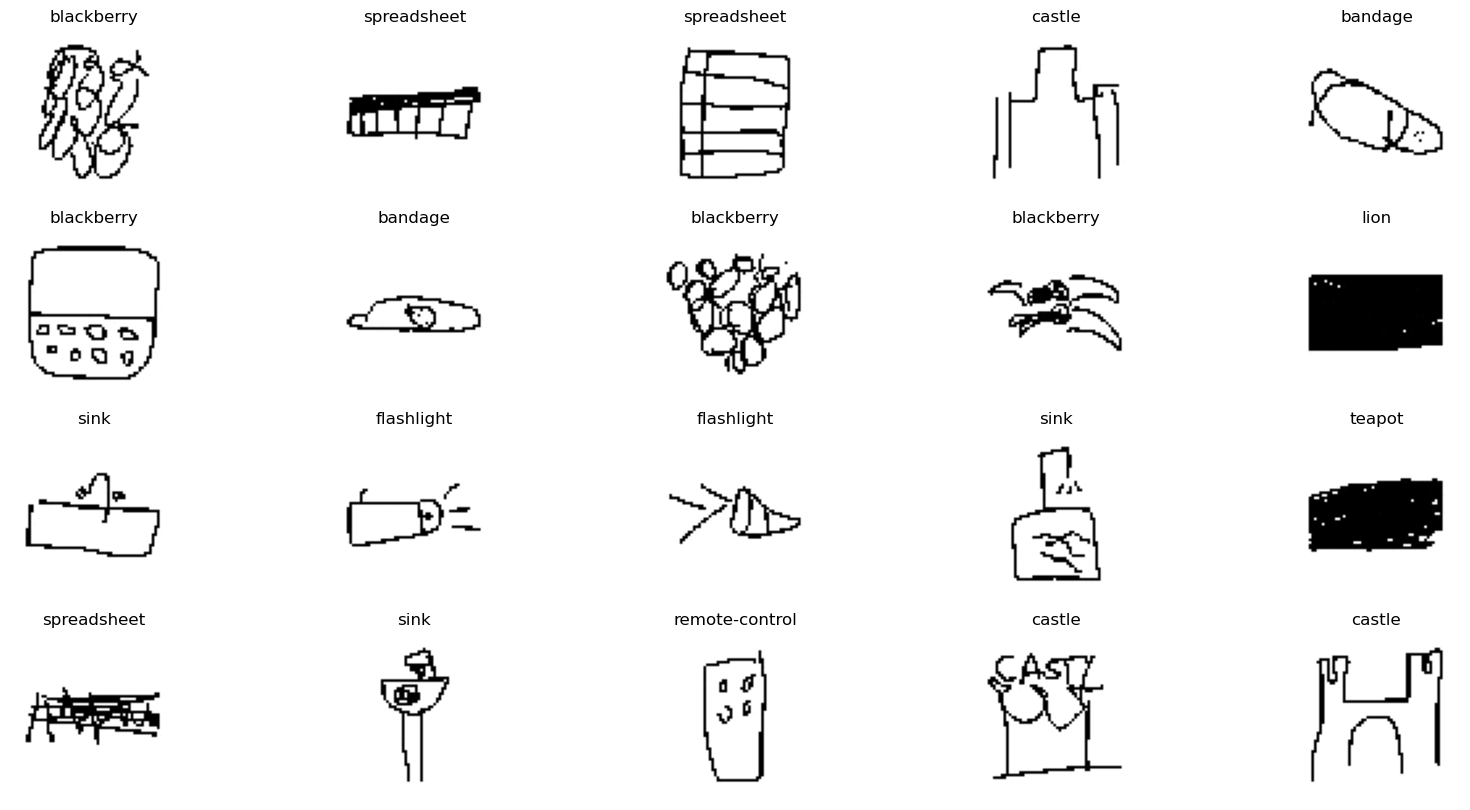

Imágenes aleatorias del conjunto de prueba:


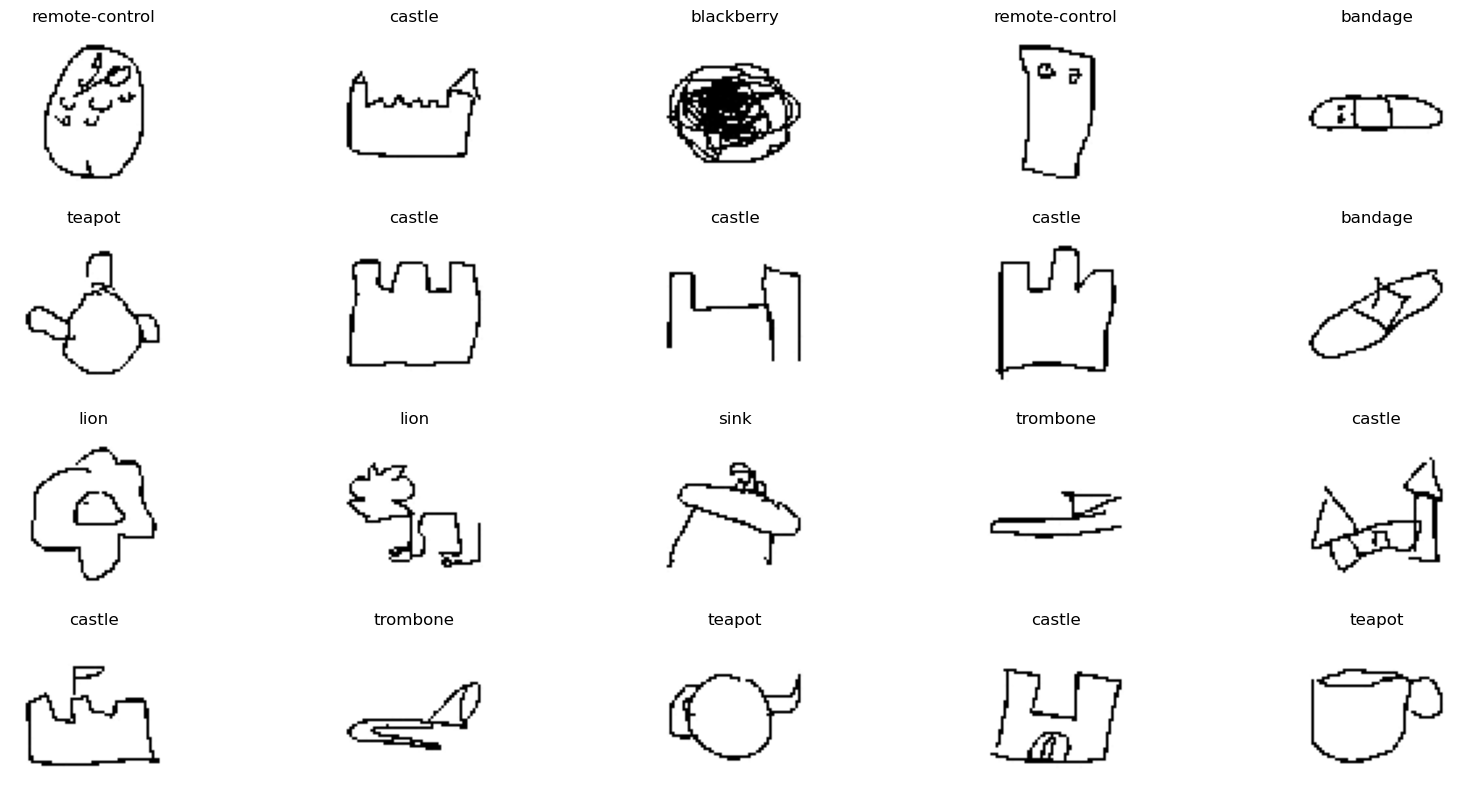

In [9]:
# Se muestran 20 imágenes aleatorias del conjunto de entrenamiento
print("Imágenes aleatorias del conjunto de entrenamiento:")
plotRandomImages(X_train, y_train, class_mapping, num_images=20)

# Se muestran 20 imágenes aleatorias del conjunto de prueba
print("Imágenes aleatorias del conjunto de prueba:")
plotRandomImages(X_test, y_test, class_mapping, num_images=20)

<h3>Creación, entrenamiento y evaluación de modelos MLP usando QuickDraw-10</h3>

Se define la función <b>trainAndEvaluate()</b> para poder realizar el proceso de entrenamiento y evaluación del modelo, junto con obtener la matriz de confusión y las métricas como Accuracy. En esta función se obtienen las métricas de desempeño, correspondiente a la accuracy total, la matriz de confusión y la accuracy por clase de cada iteración. Luego, cada métrica se junta en un arreglo de NumPy para luego obtener la mediana correspondiente. En cada iteración se imprime la accuracy total obtenida y las accuracy por clase, y al final de todo el proceso se imprime la mediana de la accuracy total, la mediana de la matriz de confusión y la mediana de las accuracy por clase (Obtenidas tras obtener la accuracy por clase de cada iteración individual). 

<b>NOTA: Para evitar sobrecarga de output, al utilizar model.fit, el parametro verbose, el cual permite ver los resultados individuales de cada epoch, se coloca en valor 0, de tal forma de que solo se muestren los valores de accuracy total, accuracy por clase y las medianas correspondientes.</b>

In [10]:
'''
Entradas: Un número que identifica cuál modelo MLP usar, un arreglo de NumPy que contiene las imágenes de entrenamiento,
un arreglo de NumPy que contiene las etiquetas de entrenamiento, un arreglo de NumPy que contiene las imágenes de prueba, un 
arreglo de NumPy que contiene las etiquetas de prueba, las funciones de activación del modelo, la función de perdida del modelo, el número de
neuronas a utilizar en las capas ocultas y finalmente, el número de epochs, batch size e iteraciones a usar, estos tres últimos teniendo valores de 
20, 32 y 5 respectivamente por defecto.
Salidas: Una lista de accuracy obtenidas en cada iteración, la mediana de la accuracy total y una lista que contiene la mediana de las accuracy por 
clase.
Descripción: Función que entrena y evalúa un modelo MLP 5 veces, almacenando las accuracy y matrices de confusión obtenidas en cada ejecución. 
Al final, calcula y retorna la mediana de la accuracy total, la mediana de la matriz de confusión y la mediana de cada accuracy por clase.
'''
def trainAndEvaluate(num_model, X_train, y_train, X_test, y_test, acts, loss_func, num_neuronas, epochs=20, batch_size=32, num_runs=5):
    results = [] # Lista donde se almacenan los valores de accuracy total por iteración
    class_accuracies = [] # Lista donde se almacenan los valores de accuracy por clase por iteración
    cms = [] # Lista donde se almacenan las matrices de confusión por iteración
    set_seed() # Se utiliza la semilla para evitar aleatoriedad y tener reproducibilidad
    for run in range(num_runs):
        if num_model == 1:
            # Se crea y utiliza el modelo MLP 1
            model = createMLP1(input_shape, num_classes, acts, loss_func, num_neuronas)
        elif num_model == 2:
            # Se crea y utiliza el modelo MLP 2
            model = createMLP2(input_shape, num_classes, acts, loss_func, num_neuronas)
        elif num_model == 3:
            # Se crea y utiliza el modelo MLP 3
            model = createMLP3(input_shape, num_classes, acts, loss_func, num_neuronas)
        # Si la función de pérdida es Categorical Cross-Entropy, las etiquetas deben ser de tipo Categorical
        if loss_func == 'categorical_crossentropy':
            # Se transforman las etiquetas de entrenamiento y prueba a Categorical
            y_train_used = to_categorical(y_train, num_classes=num_classes)
            y_test_used = to_categorical(y_test, num_classes=num_classes)
        else:
            # Si la función de pérdida es Sparse Categorical Cross-Entropy, las etiquetas deben mantenerse de tipo entero.
            y_train_used = y_train
            y_test_used = y_test
        # Se realiza el entrenamiento con el modelo creado, con 20 epochs y batch size 32 por defecto
        model.fit(X_train, y_train_used, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_used), verbose=0)
        # Se calcula el valor de accuracy total 
        loss, accuracy = model.evaluate(X_test, y_test_used, verbose=1)
        results.append(accuracy)
        print(f"Iteración {run} - Accuracy Total: {accuracy}")
        
        # Se obtienen las predicciones del modelo
        y_pred_classes = np.argmax(model.predict(X_test), axis=1)
        
        # Se cálcula la matriz de confusión asociado a la iteración
        cm = confusion_matrix(y_test, y_pred_classes)
        cms.append(cm)
        # NOTA: Lo siguiente se deja comentado, para evitar sobrecarga de output. Lo que hace es mostrar la matriz de confusión asociada
        # a cada iteración.
        #ConfusionMatrixDisplay(confusion_matrix=cm).plot()
        #plt.title(f'Matriz de Confusión - Iteración {run}')
        #plt.show()
        # Se cálcula las accuracy por cada clase utilizando la matriz de confusión
        class_accuracy = cm.diagonal() / cm.sum(axis=0)
        class_accuracies.append(class_accuracy)
        print(f'Accuracy por cada clase en Iteración {run} : {class_accuracy}')
    # Se imprimen los valores de salida: Mediana de la accuracy total, mediana de la matriz de confusión y mediana de accuracy por clase  
    print('-------------------------------------\n')
    cms = np.array(cms)
    median_cm = np.nanmedian(cms, axis=0)
    median_cm = median_cm.astype(int)
    ConfusionMatrixDisplay(confusion_matrix=median_cm).plot()
    plt.title(f'Mediana de la Matriz de Confusión tras 5 iteraciones')
    plt.show()
    class_accuracies = np.array(class_accuracies)
    median_class_accuracies = np.nanmedian(class_accuracies, axis=0)
    print(f'Mediana de la Accuracy por Clase en {num_runs} Iteraciones: {median_class_accuracies}')
    median_accuracy = np.median(results)
    print(f'Mediana de la Accuracy Total en {num_runs} Iteraciones: {median_accuracy:.4f}')
    
    return results, median_accuracy, median_class_accuracies

Para poder entrenar y definir el modelo es necesario definir el shape de entrada y el número de clases a utilizar, este último corresponde a 10 clases.

In [11]:
# Se define el shape de entrada y el número de clases
input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

<h3>Entrenamientos, evaluaciones y matrices de confusión del MLP 1 usando QuickDraw-10</h3>

Se realiza el llamado a la función <b>trainAndEvaluate()</b> usando el <b>MLP de dos capas ocultas</b>. Se puede ver a continuación los resultados en cada iteración, es decir, los valores de accuracy total y por clase. Al final, se muestra la mediana de la matriz de confusión, la mediana de la accuracy total y la mediana de la accuracy por cada clase.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5317 - loss: 1.3790
Iteración 0 - Accuracy Total: 0.5977701544761658
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy por cada clase en Iteración 0 : [0.82142857 0.54605263 0.66666667 0.475      0.46728972 0.68817204
 0.66019417 0.74747475 0.74452555 0.44680851]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6279 - loss: 1.1987
Iteración 1 - Accuracy Total: 0.6380789279937744
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 1 : [0.79381443 0.640625   0.81176471 0.78021978 0.43274854 0.67368421
 0.69306931 0.9375     0.72222222 0.38421053]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5476 - loss: 1.3802 
Iteración 2 - Accuracy Total: 0.6037735939025879
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 2 : [0.85106383 0.51612903 0.55555556 0.60606061 0.54255319 0.79104478
 0.66666667 0.66949153 0.68       0.46099291]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1

C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6002 - loss: 1.2506
Iteración 4 - Accuracy Total: 0.6363636255264282
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 4 : [0.86153846 0.59354839 0.74509804 0.75       0.47619048 0.65420561
 0.71428571 0.94339623 0.75       0.3919598 ]
-------------------------------------



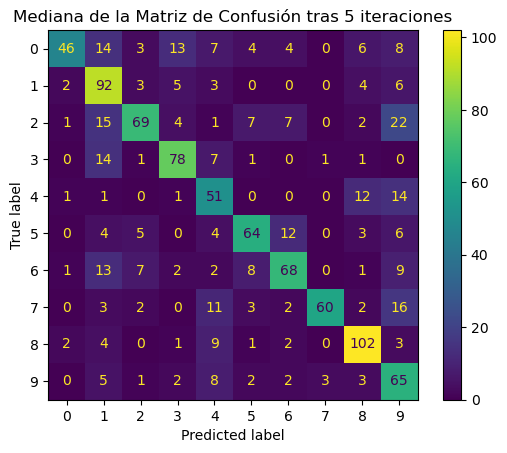

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.8362462  0.54605263 0.70588235 0.6780303  0.4717401  0.68092813
 0.67986799 0.84248737 0.73337388 0.41938415]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6038


In [12]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-10
results_mlp1, median_mlp1, median_class_accuracies_mlp1 = trainAndEvaluate(1, X_train, y_train, X_test, y_test, 
                                                                           ['relu','sigmoid'], 'sparse_categorical_crossentropy',[128,64])

<h3>Gráfico de Accuracy Total por cada iteración del Modelo MLP 1 usando QuickDraw-10</h3>

Se crea y utiliza la función <b>createTotalAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la accuracy total obtenida por cada iteración.

In [13]:
'''
Entrada: Recibe una lista que contiene la accuracy total por cada iteración, el numero del modelo y el dataset usado
Salida: No tiene como tal, pero muestra el gráfico de barras de los valores de accuracy total por cada iteración
Descripción: Función que recibe una lista que contiene la métrica de desempeño accuracy total por cada iteración y crea y muestra un gráfico de barras.
'''
def createTotalAccuracyPlot(resultados, num_modelo, dataset):
    # Datos para la gráfica
    clases = [0, 1, 2, 3, 4]
    valores = resultados
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(clases, valores, color='lightgreen')
    plt.xlabel('Iteración')
    plt.ylabel('Accuracy Total')
    plt.title('Accuracy Total por Iteración en el modelo MLP ' + str(num_modelo) + ' usando ' + dataset)
    plt.xticks(clases, [str(clase) for clase in clases])
    plt.show()

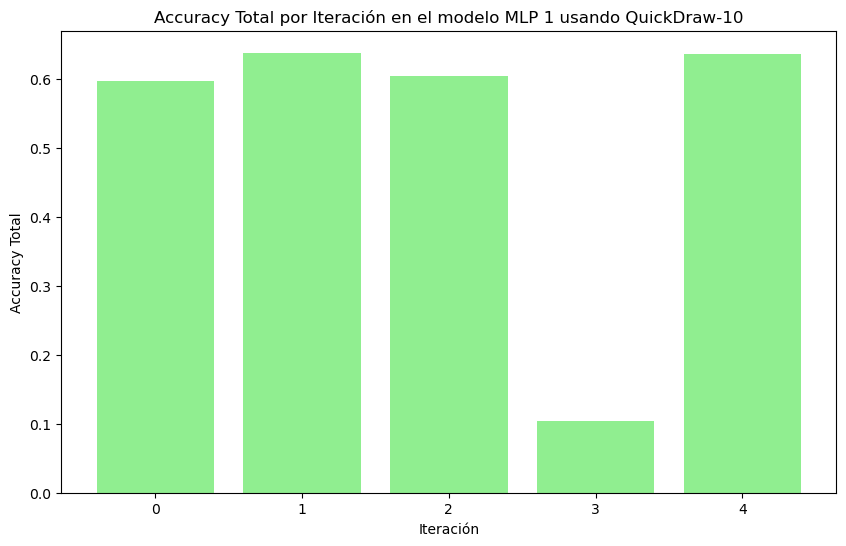

In [14]:
# Se crea y muestra el gráfico de barras asociado a cada iteración del Modelo MLP1
createTotalAccuracyPlot(results_mlp1,1, 'QuickDraw-10')

<h3>Gráfico de la Mediana de la Accuracy por cada clase del Modelo MLP 1 usando QuickDraw-10</h3>
Se crea la función <b>createClassAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la mediana de la accuracy obtenida por cada clase.


In [15]:
'''
Entrada: Diccionario que contiene la accuracy promedio de cada clase, el número del modelo y el dataset usado
Salida: No tiene como tal, pero muestra un gráfico de barras de la accuracy promedio por cada clase
Descripción: Función que gráfica el valor de la accuracy promedio obtenido por cada clase del modelo MLP.
'''
def createClassAccuracyPlot(accuracies, num_modelo, dataset):
    # Datos para la gráfica
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(accuracies)), accuracies, color='skyblue')
    plt.xlabel('Clase')
    plt.ylabel('Mediana de Accuracy por Clase')
    plt.title('Mediana de la Accuracy por Clase en el modelo MLP ' + str(num_modelo)  + ' usando ' + dataset)
    plt.xticks(range(len(accuracies)), [str(clase) for clase in range(len(accuracies))])
    plt.show()

Se utiliza la función para poder mostrar el gráfico de barras correspondiente a la mediana de la accuracy por clase correspondiente al modelo MLP 1.

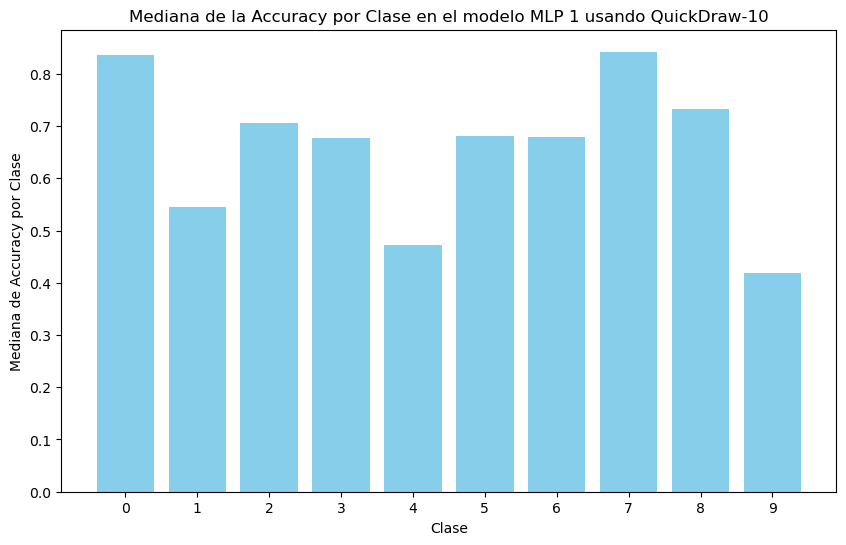

In [16]:
# Se crea y muestra el gráfico de barras asociado a cada clase del Modelo MLP 1
createClassAccuracyPlot(median_class_accuracies_mlp1, 1, 'QuickDraw-10')

<h3>Entrenamientos, evaluaciones y matrices de confusión del MLP 2 usando QuickDraw-10</h3>

Se realiza el llamado a la función <b>trainAndEvaluate()</b> usando el <b>MLP de tres capas ocultas</b>.  Se puede ver a continuación los resultados en cada iteración, es decir, los valores de accuracy total y por clase. Al final, se muestra la mediana de la matriz de confusión, la mediana de la accuracy total y la mediana de la accuracy por cada clase.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 1.7505
Iteración 0 - Accuracy Total: 0.583190381526947
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 0 : [0.9375     0.55782313 0.50510204 0.44843049 0.50980392 0.75324675
 0.77027027 0.84722222 0.8018018  0.4527027 ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5526 - loss: 1.3642 
Iteración 1 - Accuracy Total: 0.6217838525772095
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 1 : [0.78723404 0.7008547  0.61111111 0.52356021 0.51162791 0.59482759
 0.76041667 0.84146341 0.90625    0.39790576]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - loss: 0.9923
Iteración 2 - Accuracy Total: 0.6415094137191772
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 2 : [0.65441176 0.60897436 0.61111111 0.5974026  0.55952381 0.66666667
 0.60666667 0.62903226 0.83636364 0.7037037 ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.57

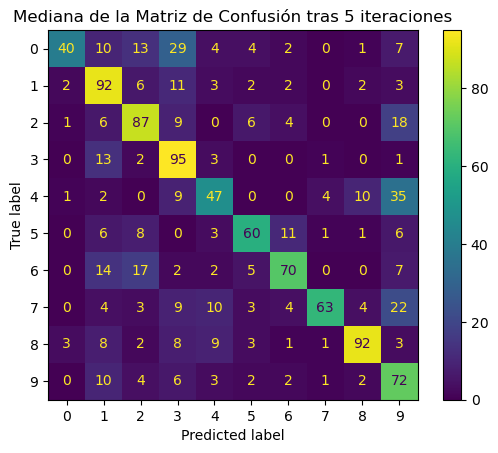

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.85454545 0.55782313 0.61111111 0.54913295 0.51162791 0.69767442
 0.76041667 0.84722222 0.8018018  0.4171123 ]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6184


In [17]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-10
results_mlp2, median_mlp2, median_class_accuracies_mlp2 = trainAndEvaluate(2, X_train, y_train, X_test, y_test, 
                                                                          ['relu','relu', 'relu'], 'categorical_crossentropy', [256, 256, 256])

<h3>Gráfico de Accuracy Total por cada iteración del Modelo MLP 2 usando QuickDraw-10</h3>

Se utiliza la función <b>createTotalAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la accuracy total obtenida por cada iteración.

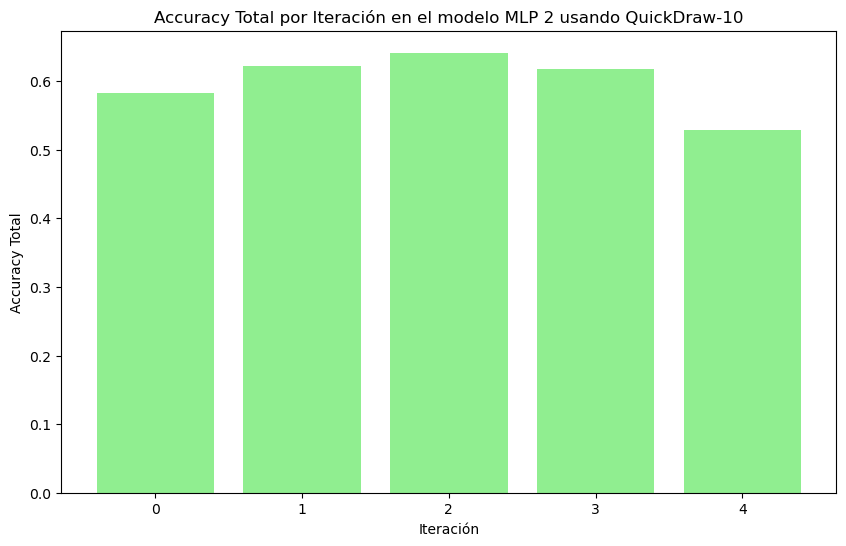

In [18]:
# Se crea y muestra el gráfico de barras asociado a cada iteración del modelo MLP 2
createTotalAccuracyPlot(results_mlp2, 2 , 'QuickDraw-10')

<h3>Gráfico de la Mediana de la Accuracy por cada clase del Modelo MLP 2 usando QuickDraw-10</h3>
Se utiliza la función <b>createClassAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la accuracy obtenida por cada clase.

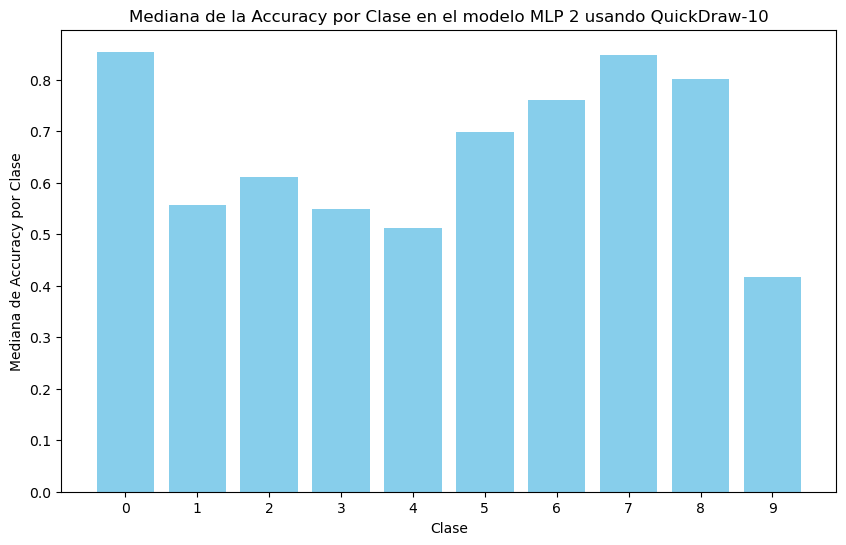

In [19]:
# Se crea y muestra el gráfico de barras asociado a cada clase del Modelo MLP 2
createClassAccuracyPlot(median_class_accuracies_mlp2, 2, 'QuickDraw-10')

<h3>Entrenamientos, evaluaciones y matrices de confusión del MLP 3 con QuickDraw-10</h3>

Se realiza el llamado a la función <b>trainAndEvaluate()</b> usando el <b>MLP de cuatro capas ocultas</b>. Se puede ver a continuación los resultados en cada iteración, es decir, los valores de accuracy total y por clase. Al final, se muestra la mediana de la matriz de confusión, la mediana de la accuracy total y la mediana de la accuracy por cada clase.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - loss: 1.1655
Iteración 0 - Accuracy Total: 0.6397941708564758
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy por cada clase en Iteración 0 : [0.87692308 0.60897436 0.64615385 0.63970588 0.43076923 0.55462185
 0.70535714 0.97619048 0.82608696 0.60416667]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5404 - loss: 1.4239
Iteración 1 - Accuracy Total: 0.5651801228523254
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy por cada clase en Iteración 1 : [0.86666667 0.40839695 0.73529412 0.80952381 0.37777778 0.67816092
 0.72277228 1.         0.82857143 0.36315789]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - loss: 1.0519
Iteración 2 - Accuracy Total: 0.6775299906730652
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy por cada clase en Iteración 2 : [0.70731707 0.75221239 0.74736842 0.59375    0.52631579 0.67307692
 0.62878788 0.83333333 0.75       0.62105263]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.56

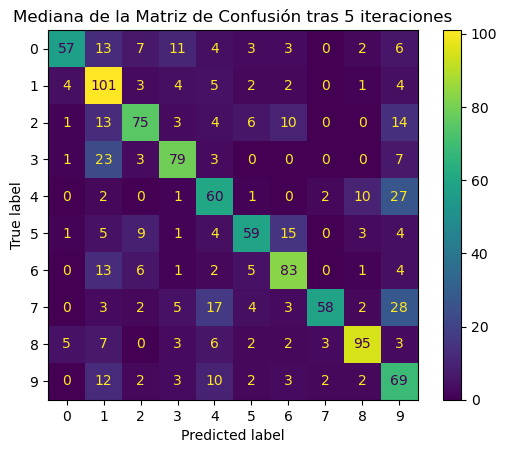

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.82105263 0.48792271 0.67619048 0.63970588 0.52631579 0.67816092
 0.70535714 0.87878788 0.82608696 0.38172043]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6072


In [20]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-10
results_mlp3, median_mlp3, median_class_accuracies_mlp3 = trainAndEvaluate(3, X_train, y_train, X_test, y_test, 
                                                                        ['relu','relu', 'relu', 'relu'], 'categorical_crossentropy',[512, 256, 128, 64])

<h3>Gráfico de Accuracy Total por cada iteración del Modelo MLP 3 usando QuickDraw-10</h3>

Se utiliza la función <b>createTotalAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la accuracy total obtenida por cada iteración.

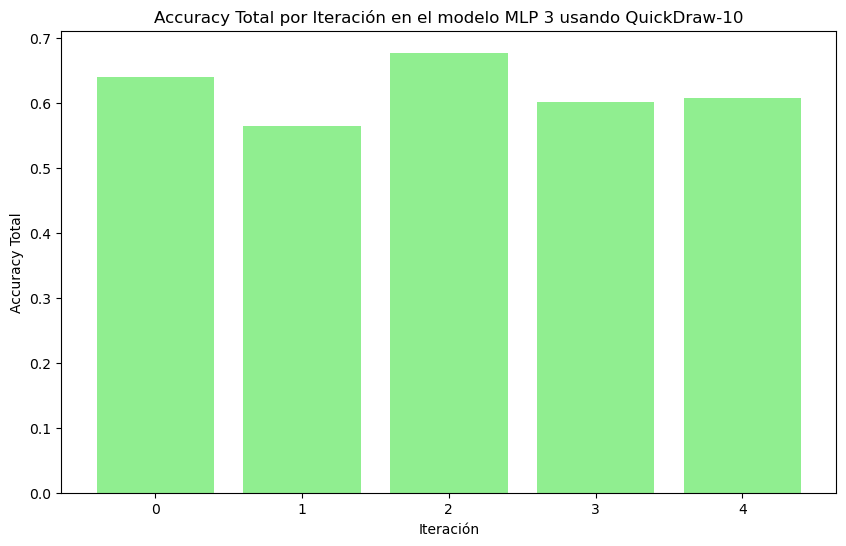

In [21]:
# Se crea y muestra el gráfico de barras asociado a cada iteración del Modelo MLP 3
createTotalAccuracyPlot(results_mlp3,3, 'QuickDraw-10')

<h3>Gráfico de la Mediana de la Accuracy por cada clase del Modelo MLP 3 usando QuickDraw-10</h3>
Se utiliza la función <b>createClassAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la mediana de la accuracy obtenida por cada clase.

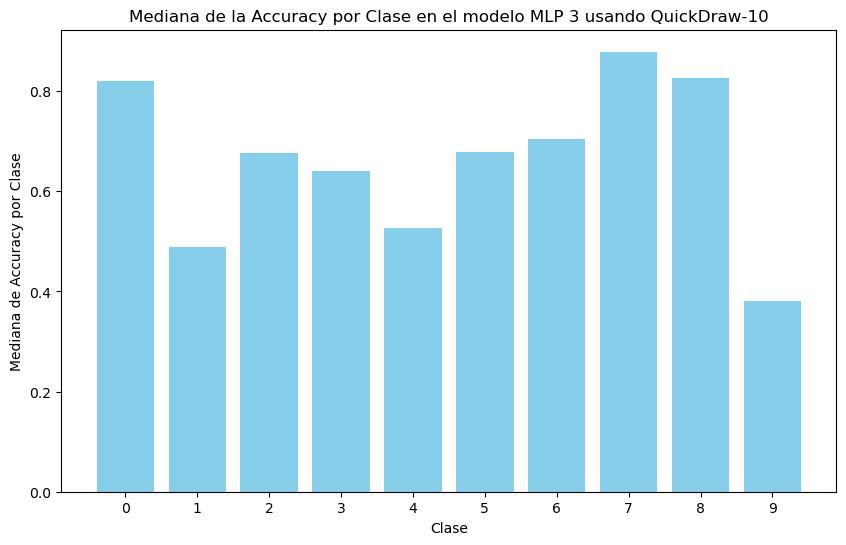

In [22]:
# Se crea y muestra el gráfico de barras asociado a cada clase del Modelo MLP 3
createClassAccuracyPlot(median_class_accuracies_mlp3, 3, 'QuickDraw-10')

<h3>Comparación entre los modelos MLP usando el subconjunto QuickDraw-10</h3>

Con los modelos ya evaluados, ahora se pueden obtener tablas y gráficos que nos permitan comparar los valores de Accuracy obtenidos. Para poder crear las tablas (dataframes en realidad) se crea la función <b>createDataTable().</b>

In [23]:
'''
Entrada: Tres strings (nombres de etiquetas) y tres listas
Salida: No tiene como tal, pero muestra un dataframe de Pandas
Descripción: Función que crea un dataframe de Pandas de tres columnas y muestra la información asociada
'''
def createDataTable(tag1, data1, tag2, data2, tag3, data3):
    data = {tag1: data1,
           tag2: data2,
           tag3: data3
        }
    df = pd.DataFrame(data)
    display(df) 

<h3>Tabla de Accuracy Total por cada modelo e iteración usando QuickDraw-10</h3>
Utilizando Pandas y la función <b>createDataTable()</b>, se crea un dataframe para registrar los valores de accuracy total correspondiente a los tres modelos en cada iteración. results_mlpx representa las accuracies obtenidas en cada modelo MLP X, con X siendo 1, 2 o 3 dependiendo del modelo.

In [24]:
# Se crea una tabla (dataframe) que contiene la accuracy total de cada modelo e iteración
createDataTable('AccuracyTotalMLP1', results_mlp1, 'AccuracyTotalMLP2', results_mlp2, 'AccuracyTotalMLP3', results_mlp3)

,AccuracyTotalMLP1,AccuracyTotalMLP2,AccuracyTotalMLP3
0,0.597770,0.583190,0.639794
1,0.638079,0.621784,0.565180
2,0.603774,0.641509,0.677530
3,0.104631,0.618353,0.602058
4,0.636364,0.529160,0.607204


<h3>Tabla de la Mediana de la Accuracy por cada Clase usando QuickDraw-10</h3>
Utilizando Pandas y la función <b>createDataTable()</b>, se crea un dataframe para registrar los valores de cada mediana de accuracy obtenida por clase asociada a cada modelo. median_class_accuracies_mlpX representa las accuracy por clase obtenidas en el modelo X, con X siendo 1, 2 o 3 dependiendo del modelo.

In [25]:
# Se crea una tabla (dataframe) que contiene la mediana la accuracy por cada clase
createDataTable('MedianaAccuracyClaseMLP1', median_class_accuracies_mlp1, 'MedianaAccuracyClaseMLP2', median_class_accuracies_mlp2, 
                'MedianaAccuracyClaseMLP3', median_class_accuracies_mlp3)

,MedianaAccuracyClaseMLP1,MedianaAccuracyClaseMLP2,MedianaAccuracyClaseMLP3
0,0.836246,0.854545,0.821053
1,0.546053,0.557823,0.487923
2,0.705882,0.611111,0.676190
3,0.678030,0.549133,0.639706
4,0.471740,0.511628,0.526316
5,0.680928,0.697674,0.678161
6,0.679868,0.760417,0.705357
7,0.842487,0.847222,0.878788
8,0.733374,0.801802,0.826087
9,0.419384,0.417112,0.381720


<h3>Gráfico de la Mediana de la Accuracy de cada modelo MLP usando QuickDraw-10</h3>
Se crea y utiliza la función <b>createMedianAccuracyPlot()</b> para poder comparar los valores de la mediana de la accuracy total de cada modelo.

In [26]:
'''
Entradas: Los valores de la mediana de la accuracy total de cada modelo MLP y el dataset usado
Salida: No tiene como tal, pero muestra un gráfico de barras usando matplotlib
Descripción: Función que crea y muestra un gráfico de barras de la accuracy mediana de los modelos MLP
'''
def createMedianAccuracyPlot(median_mlp1, median_mlp2, median_mlp3, dataset):
    # Mediana de la accuracy total para cada modelo evaluado
    print(f'Mediana de la Accuracy Total tras 5 iteraciones de MLP 1: {median_mlp1:.4f}')
    print(f'Mediana de la Accuracy Total tras 5 iteraciones de MLP 2: {median_mlp2:.4f}')
    print(f'Mediana de la Accuracy Total tras 5 iteraciones de MLP 3: {median_mlp3:.4f}')

    # Se cargan los datos a graficar
    models = ['MLP1', 'MLP2', 'MLP3']
    median_accuracies = [median_mlp1, median_mlp2, median_mlp3]
    # Configuracioness del gráfico
    plt.bar(models, median_accuracies, color=['deepskyblue', 'limegreen', 'darkred'])
    plt.xlabel('Modelo')
    plt.ylabel('Mediana de 5 iteraciones (Accuracy)')
    plt.title('Mediana de Accuracy Total de cada Modelo MLP usando ' + dataset)
    plt.show()

Mediana de la Accuracy Total tras 5 iteraciones de MLP 1: 0.6038
Mediana de la Accuracy Total tras 5 iteraciones de MLP 2: 0.6184
Mediana de la Accuracy Total tras 5 iteraciones de MLP 3: 0.6072


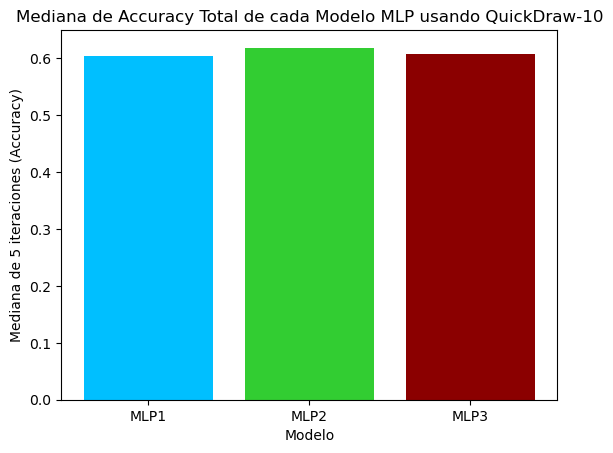

In [27]:
# Se crea y muestra un gráfico de barras de la accuracy mediana de los modelos MLP
createMedianAccuracyPlot(median_mlp1, median_mlp2, median_mlp3, 'QuickDraw-10')

<h3>Gráfico de la Accuracy Total por Iteración de cada modelo MLP usando QuickDraw-10</h3>
Se crea y utiliza la función <b>creatAccuracyPlot()</b>, la cual crea un gráfico de barras para comparar los valores accuracy obtenidos en cada modelo.

In [28]:
'''
Entradas: Los valores de accuracy correspondiente a cada modelo MLP junto con etiquetas para el gráfico
Salida: No tiene como tal, pero muestra un gráfico de barras usando matplotlib
Descripción: Función que crea y muestra un gráfico de barras respecto a valores de accuracy provenientes de modelos MLP
'''
def createAccuracyPlot(data_mlp1, data_mlp2, data_mlp3, x_label, y_label, title, num_classes):
    # Se define el ancho de las barras
    bar_width = 0.25

    # Se define las posiciones de las barras para cada grupo
    r1 = np.arange(len(data_mlp1))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Se crean el gráfico usando los datos asociados
    plt.figure(figsize=(14, 8))
    plt.bar(r1, data_mlp1, color='deepskyblue', width=bar_width, edgecolor='grey', label='MLP 1')
    plt.bar(r2, data_mlp2, color='limegreen', width=bar_width, edgecolor='grey', label='MLP 2')
    plt.bar(r3, data_mlp3, color='darkred', width=bar_width, edgecolor='grey', label='MLP 3')

    # Configuraciones del gráfico
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks([r + bar_width for r in range(len(data_mlp1))], num_classes)
    plt.title(title)
    plt.legend()
    plt.show()

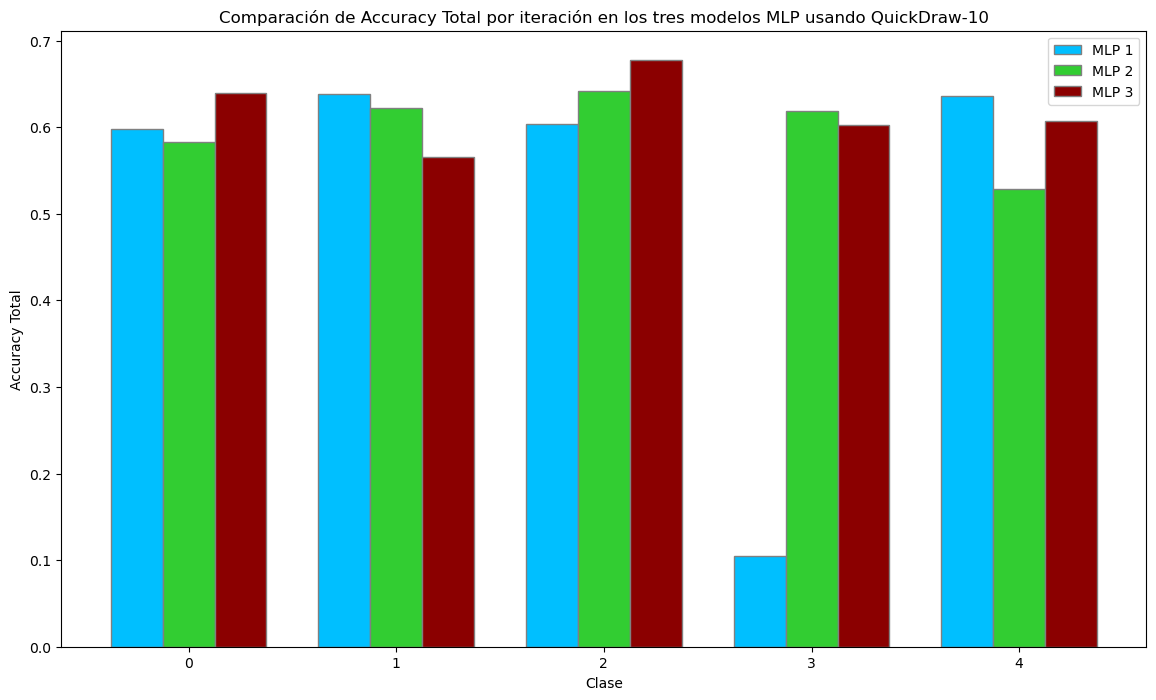

In [29]:
# Se crea un gráfico de barras que compara los valores de Accuracy Total por Iteración de cada modelo MLP
createAccuracyPlot(results_mlp1, results_mlp2, results_mlp3, 'Clase', 'Accuracy Total', 
                   'Comparación de Accuracy Total por iteración en los tres modelos MLP usando QuickDraw-10', range(0,5))

<h3>Comparación de la Mediana de la Accuracy por Clase usando QuickDraw-10</h3>
Se vuelve a utilizar <b>createAccuracyPlot()</b>, para comparar los valores la mediana de la accuracy por clase obtenidos en cada modelo.

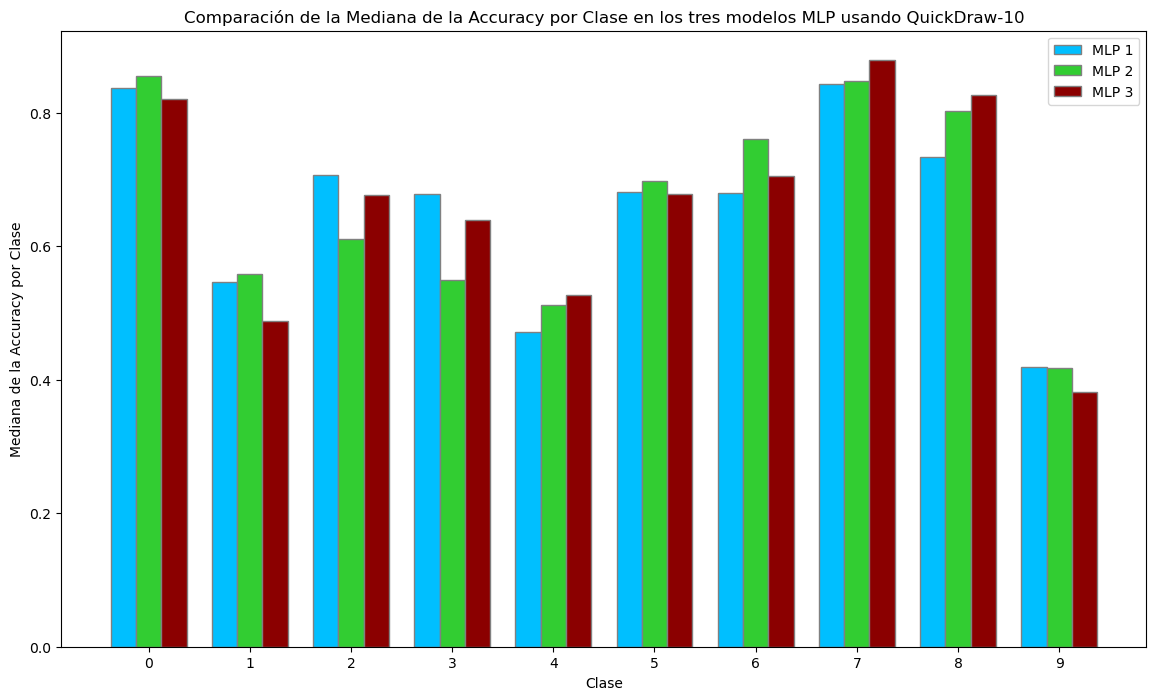

In [30]:
# Se crea un gráfico de barras que compara los valores de la Mediana de la Accuracy por Clase de cada modelo MLP
createAccuracyPlot(median_class_accuracies_mlp1, median_class_accuracies_mlp2, median_class_accuracies_mlp3, 'Clase', 
                   'Mediana de la Accuracy por Clase', 
                   'Comparación de la Mediana de la Accuracy por Clase en los tres modelos MLP usando QuickDraw-10', range(0,10))

<h2>MODIFICACIÓN DE HYPERPARAMETROS CON QUICKDRAW-10</h2>

Se busca comprobar como cambian los valores de accuracy tras modificar los hyperparametros (epochs y batch size) y las configuraciones de los modelos MLP. A continuación, se realizan pruebas para los experimentos.

<h2>Modificación de epochs y batch size</h2>
En esta parte, solo se modifican los valores de epoch de 20 a 100 y batch size, de 32 a 128, utilizando las configuraciones por defecto de los modelos MLP. En otras palabras, se vuelven a realizar las mismas evaluaciones / entrenamientos ya realizados, pero con un mayor número de epochs y batch size. Se busca comparar principalmente como cambia el valor de la Mediana de la accuracy Total.

<h3>Modelo MLP 1 con 100 epochs y 128 batch size usando QuickDraw-10</h3>
Tras utilizar la función <b>trainAndEvaluate()</b> con 100 epochs y batch size 128, el valor de la mediana de la accuracy total aumenta de 0,6038 a 0,6424.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.6442 - loss: 1.3703
Iteración 0 - Accuracy Total: 0.645797610282898
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 0 : [0.64393939 0.67460317 0.74157303 0.84269663 0.71641791 0.80555556
 0.63235294 0.46190476 0.64556962 0.5862069 ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.6304 - loss: 1.3998
Iteración 1 - Accuracy Total: 0.6423670649528503
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.76136364 0.53488372 0.68965517 0.73076923 0.65306122 0.56097561
 0.65048544 0.63703704 0.75409836 0.53333333]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.6563 - loss: 1.2604
Iteración 2 - Accuracy Total: 0.6638078689575195
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.74509804 0.62937063 0.56547619 0.8255814  0.58415842 0.70886076
 0.77272727 0.65034965 0.68874172 0.59047619]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accurac

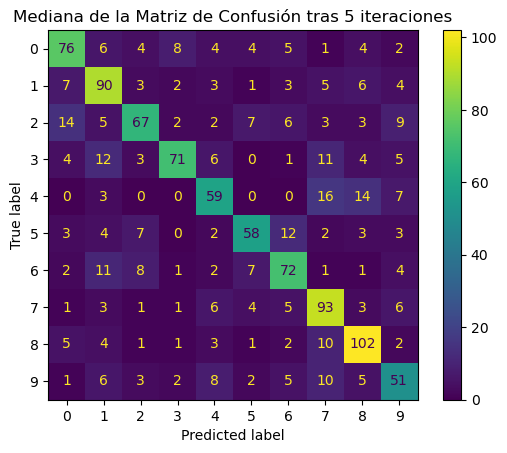

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.64912281 0.62937063 0.68965517 0.8255814  0.58870968 0.70886076
 0.65048544 0.63703704 0.68874172 0.55555556]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6424


In [31]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-10. Se usan 100 epochs y batch size 128.
results_mlp1EB, median_mlp1EB, median_class_accuracies_mlp1EB = trainAndEvaluate(1, X_train, y_train, X_test, y_test,  
                                                                                 ['relu','sigmoid'], 'sparse_categorical_crossentropy',[128,64],  
                                                                                 epochs=100, batch_size=128)

<h3>Modelo MLP 2 con 100 epochs y 128 batch size usando QuickDraw-10</h3>
Tras utilizar la función <b>trainAndEvaluate()</b> con 100 epochs y batch size 128, el valor de la mediana de la accuracy total aumenta de 0,6184 a 0,6467.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6619 - loss: 1.6349 
Iteración 0 - Accuracy Total: 0.661234974861145
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.79787234 0.5890411  0.64179104 0.96       0.55797101 0.61403509
 0.66929134 0.70454545 0.81521739 0.45614035]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6300 - loss: 1.7043 
Iteración 1 - Accuracy Total: 0.6346483826637268
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.72       0.55932203 0.75641026 0.69724771 0.56435644 0.54347826
 0.775      0.60958904 0.84158416 0.48529412]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6894 - loss: 1.4939 
Iteración 2 - Accuracy Total: 0.6466552019119263
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.48019802 0.57861635 0.76136364 0.90277778 0.52898551 0.68131868
 0.68141593 0.77669903 0.87368421 0.55238095]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

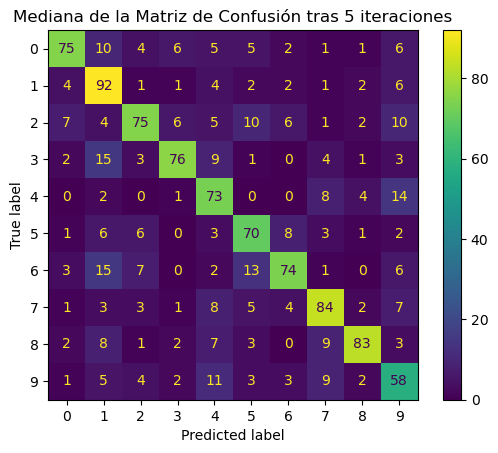

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.77227723 0.57861635 0.67826087 0.75471698 0.55797101 0.61403509
 0.71153846 0.70454545 0.84158416 0.48529412]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6467


In [32]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-10. Se usan 100 epochs y batch size 128.
results_mlp2EB, median_mlp2EB, median_class_accuracies_mlp2EB = trainAndEvaluate(2, X_train, y_train, X_test, y_test,
                                                                                  ['relu','relu', 'relu'], 'categorical_crossentropy', [256, 256, 256],
                                                                                 epochs=100, batch_size=128)

<h3>Modelo MLP 3 con 100 epochs y 128 batch size usando QuickDraw-10</h3>
Tras utilizar la función <b>trainAndEvaluate()</b> con 100 epochs y batch size 128, el valor de la mediana de la accuracy total aumenta de 0,6072 a 0,6638.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6880 - loss: 1.4378 
Iteración 0 - Accuracy Total: 0.682675838470459
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.6744186  0.61111111 0.8045977  0.89473684 0.6036036  0.65048544
 0.66666667 0.79245283 0.84347826 0.47586207]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - loss: 1.5668
Iteración 1 - Accuracy Total: 0.6329330801963806
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 1 : [0.47738693 0.59493671 0.65979381 0.77319588 0.58064516 0.77027027
 0.66981132 0.66393443 0.8961039  0.53571429]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 1.2841
Iteración 2 - Accuracy Total: 0.650943398475647
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 2 : [0.71653543 0.44298246 0.67692308 0.86021505 0.54       0.67346939
 0.75       0.89230769 0.75968992 0.51      ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.675

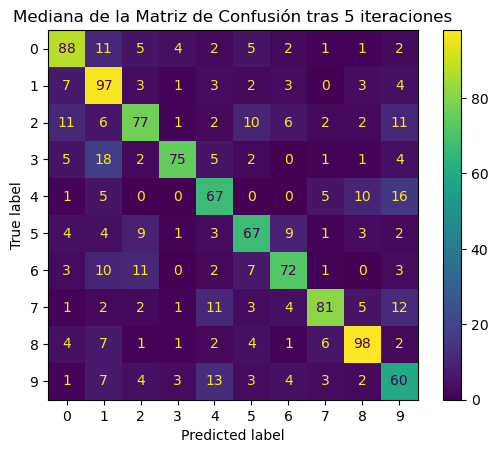

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.70967742 0.59477124 0.67692308 0.86021505 0.59016393 0.65048544
 0.75       0.79245283 0.7751938  0.51      ]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6638


In [33]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-10. Se usan 100 epochs y batch size 128.
results_mlp3EB, median_mlp3EB, median_class_accuracies_mlp3EB = trainAndEvaluate(3, X_train, y_train, X_test, y_test,
                                                                                  ['relu','relu', 'relu', 'relu'], 'categorical_crossentropy',
                                                                                 [512, 256, 128, 64], epochs=100, batch_size=128)

<h3>Gráficos de Accuracy de modelos MLP con 100 epochs y batch size 128 usando QuickDraw-10</h3>
Con los modelos ya evaluados y dado que hubieron notables cambios en los valores de accuracy total, se vuelven a crear los gráficos asociados a los resultados.

Mediana de la Accuracy Total tras 5 iteraciones de MLP 1: 0.6424
Mediana de la Accuracy Total tras 5 iteraciones de MLP 2: 0.6467
Mediana de la Accuracy Total tras 5 iteraciones de MLP 3: 0.6638


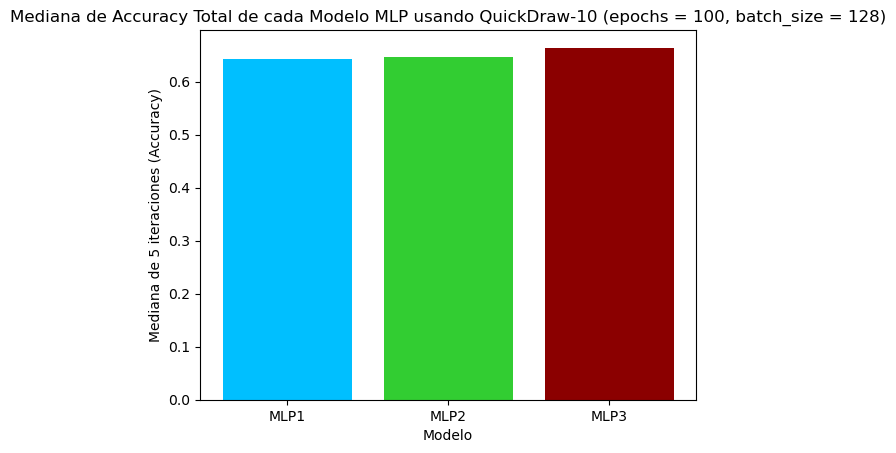

In [34]:
# Se crea y muestra un gráfico de barras de la accuracy mediana de los modelos MLP
createMedianAccuracyPlot(median_mlp1EB, median_mlp2EB, median_mlp3EB, 'QuickDraw-10 (epochs = 100, batch_size = 128)')

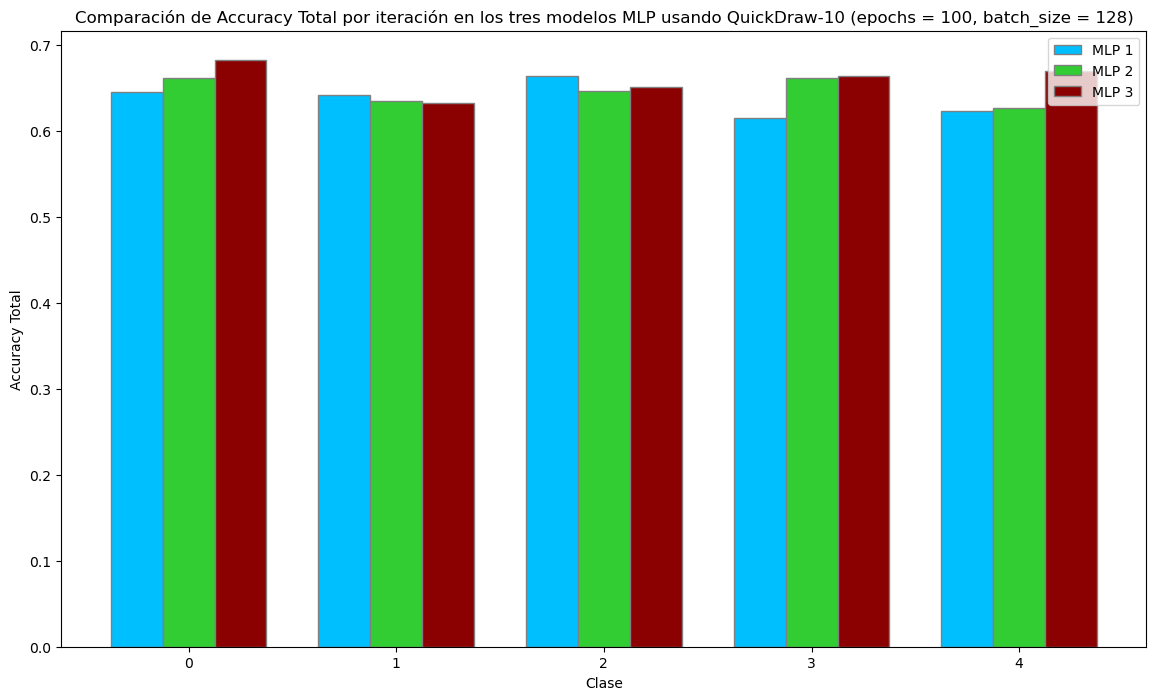

In [35]:
# Se crea un gráfico de barras que compara los valores de Accuracy Total por Iteración de cada modelo MLP
createAccuracyPlot(results_mlp1EB, results_mlp2EB, results_mlp3EB, 'Clase', 'Accuracy Total', 
                   'Comparación de Accuracy Total por iteración en los tres modelos MLP usando QuickDraw-10 (epochs = 100, batch_size = 128)', 
                   range(0,5))

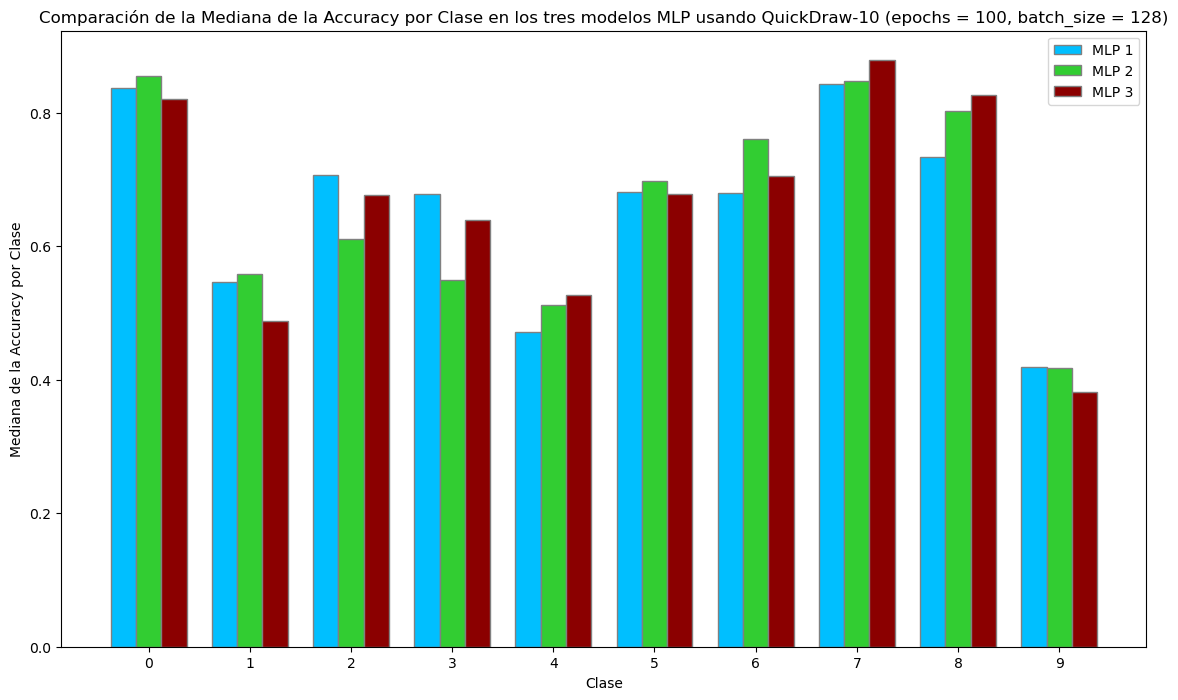

In [36]:
# Se crea un gráfico de barras que compara los valores de la Mediana de la Accuracy por Clase de cada modelo MLP
createAccuracyPlot(median_class_accuracies_mlp1, median_class_accuracies_mlp2, median_class_accuracies_mlp3, 'Clase', 
                   'Mediana de la Accuracy por Clase', 
                   'Comparación de la Mediana de la Accuracy por Clase en los tres modelos MLP usando QuickDraw-10 (epochs = 100, batch_size = 128)',
                   range(0,10))

<h2>Modificación de configuraciones del modelo</h2>

Dado que son bastantes las opciones disponibles a la hora de hacer cambios en las configuraciones del modelo, se harán las siguientes pruebas en los tres modelos:

* Cambiar la función de perdida de los modelos
* Cambiar las funciones de activación de los modelos
* Duplicar el número de neuronas

<h3>Modificación de Función de Pérdida a Categorical Cross-Entropy en Modelo MLP 1 usando QuickDraw-10</h3>

Para el modelo MLP 1, se cambia la función de pérdida de Sparse Categorical Cross-Entropy a Categorical Cross-Entropy. Se puede ver que hay un leve aumento en el valor de la mediana de la accuracy total, pasando de 0,6038 a 0,6063.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.5860 - loss: 1.3044
Iteración 0 - Accuracy Total: 0.6380789279937744
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.83870968 0.52972973 0.70707071 0.6328125  0.5        0.77333333
 0.73       0.81111111 0.7218543  0.45      ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.5155 - loss: 1.5918
Iteración 1 - Accuracy Total: 0.5600343346595764
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.96969697 0.44298246 0.70238095 0.66666667 0.33624454 0.77464789
 0.66346154 1.         0.66272189 0.41441441]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6039 - loss: 1.2759 
Iteración 2 - Accuracy Total: 0.6303601861000061
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.81176471 0.62676056 0.875      0.81578947 0.38738739 0.71111111
 0.54601227 0.82022472 0.75373134 0.48623853]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accurac

C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.5247 - loss: 1.4810
Iteración 4 - Accuracy Total: 0.6063464879989624
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 4 : [0.85106383 0.75510204 0.74324324 0.48484848 0.45333333 0.65686275
 0.55479452 0.77083333 0.61849711 0.54878049]
-------------------------------------



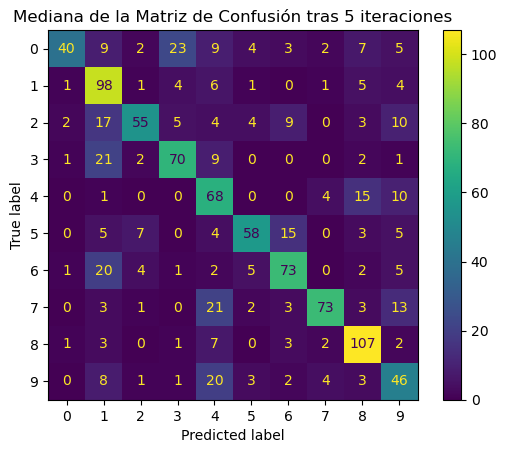

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.84488675 0.52972973 0.72515698 0.64973958 0.42036036 0.74222222
 0.60912803 0.81566792 0.6922881  0.46811927]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6063


In [37]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-10. Se cambia la función de pérdida a Categorical Cross-Entropy
results_mlp1FP, median_mlp1FP, median_class_accuracies_mlp1FP = trainAndEvaluate(1, X_train, y_train, X_test, y_test,  
                                                                                 ['relu','sigmoid'], 'categorical_crossentropy',[128,64])

<h3>Modificación de Función de Perdida a Sparse Categorical Cross-Entropy en Modelo MLP 2 usando QuickDraw-10</h3>
Para el modelo MLP 2, se cambia la función de pérdida de Categorical Cross-Entropy a Sparse Categorical Cross-Entropy. Se puede ver que hay un leve descenso en el valor de la mediana de la accuracy total, pasando de 0,6184 a 0,6158.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5234 - loss: 1.4306 
Iteración 0 - Accuracy Total: 0.6037735939025879
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.94285714 0.63709677 0.67241379 0.52777778 0.42857143 0.57024793
 0.69791667 0.85       0.77165354 0.44311377]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5743 - loss: 1.3000 
Iteración 1 - Accuracy Total: 0.6157804727554321
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.85454545 0.59259259 0.67716535 0.74747475 0.45454545 0.63063063
 0.68253968 0.84745763 0.78813559 0.3438914 ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6614 - loss: 1.0305 
Iteración 2 - Accuracy Total: 0.6466552019119263
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.63636364 0.76106195 0.6446281  0.51231527 0.5210084  0.64130435
 0.60927152 0.91071429 0.8877551  0.63043478]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

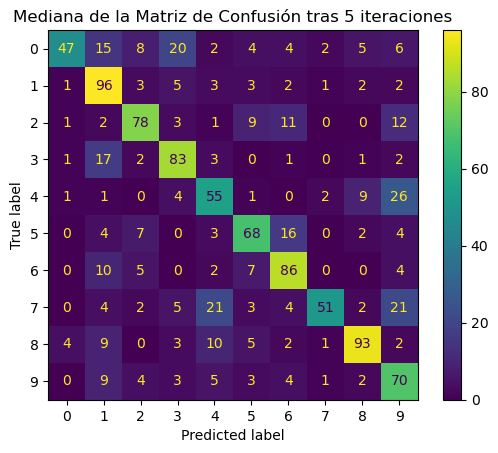

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.85454545 0.59259259 0.67708333 0.67226891 0.5210084  0.63063063
 0.65       0.85       0.78813559 0.44311377]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6158


In [38]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-10. 
# Se cambia la función de pérdida a Sparse Categorical Cross-Entropy
results_mlp2FP, median_mlp2FP, median_class_accuracies_mlp2FP = trainAndEvaluate(2, X_train, y_train, X_test, y_test,  
                                                                                  ['relu','relu', 'relu'], 'sparse_categorical_crossentropy', 
                                                                                 [256, 256, 256])

<h3>Modificación de Función de Perdida a Sparse Categorical Cross-Entropy en Modelo MLP 3 usando QuickDraw-10</h3>
Para el modelo MLP 3, se cambia la función de pérdida de Categorical Cross-Entropy a Sparse Categorical Cross-Entropy. Se puede ver que hay un leve descenso en el valor de la mediana de la accuracy total, pasando de 0,6072 a 0,5918.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5423 - loss: 1.3726
Iteración 0 - Accuracy Total: 0.5274442434310913
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 0 : [0.90909091 0.41832669 0.55333333 0.63492063 0.35       0.675
 0.74545455 0.95454545 0.68613139 0.2962963 ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6146 - loss: 1.2141
Iteración 1 - Accuracy Total: 0.5917667150497437
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 1 : [0.62831858 0.53977273 0.7260274  0.58783784 0.40571429 0.77142857
 0.58389262 0.75       0.9382716  0.45112782]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5866 - loss: 1.3037
Iteración 2 - Accuracy Total: 0.645797610282898
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 2 : [0.78461538 0.61904762 0.7721519  0.56050955 0.49693252 0.6744186
 0.63703704 0.78787879 0.74125874 0.57608696]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5388 - lo

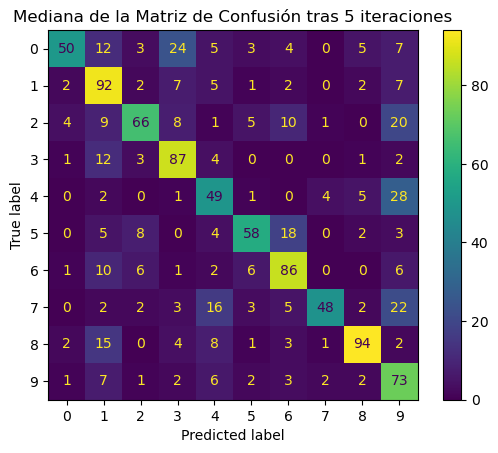

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.80769231 0.55757576 0.7260274  0.62162162 0.47572816 0.675
 0.63703704 0.78787879 0.784      0.44512195]
Mediana de la Accuracy Total en 5 Iteraciones: 0.5918


In [39]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-10
# Se cambia la función de pérdida a Sparse Categorical Cross-Entropy
results_mlp3FP, median_mlp3FP, median_class_accuracies_mlp3FP = trainAndEvaluate(3, X_train, y_train, X_test, y_test, 
                                                                        ['relu','relu', 'relu', 'relu'], 'sparse_categorical_crossentropy',
                                                                           [512, 256, 128, 64])

Dados los resultados anteriores, y que en el modelo MLP1 la mediana de la accuracy total aumentó al cambiar a Categorical Cross-Entropy, mientras que en los modelos MLP 2 y MLP 3 hubo una disminución al cambiar a Sparse Categorical Cross-Entropy, se puede concluir que Categorical Cross-Entropy es una mejor opción a la hora de escoger una función de pérdida, aunque se debe tener en consideración que tanto el aumento como disminución de accuracy es bastante leve.

<h3>Modificación de Función de Activación de Sigmoid a ELU en Modelo MLP 1 usando QuickDraw-10</h3>
Para el modelo MLP 1, se realiza un cambio de la segunda función de activación, pasando de Sigmoid a ELU. Se puede ver un aumento de la mediana de la accuracy total, pasando de 0,6038 a 0,6123.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.5948 - loss: 1.3723
Iteración 0 - Accuracy Total: 0.6106346249580383
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.80821918 0.50753769 0.75       0.67889908 0.4180791  0.80952381
 0.65217391 0.86885246 0.81481481 0.4180791 ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.5994 - loss: 1.4332
Iteración 1 - Accuracy Total: 0.6123499274253845
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.72527473 0.54705882 0.72631579 0.78378378 0.37254902 0.88888889
 0.68686869 0.92       0.57360406 0.5046729 ]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.6326 - loss: 1.1458
Iteración 2 - Accuracy Total: 0.6303601861000061
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.65322581 0.66115702 0.6        0.68939394 0.57377049 0.71111111
 0.83870968 0.82417582 0.54807692 0.43661972]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accura

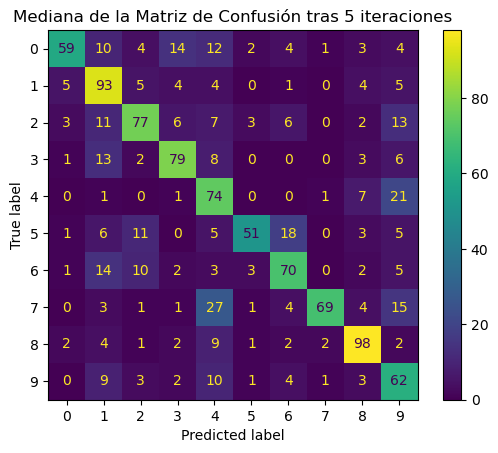

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.80821918 0.54705882 0.60839161 0.68939394 0.4180791  0.80851064
 0.65217391 0.86885246 0.80172414 0.43661972]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6123


In [40]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-10. 
# Se cambia la segunda función de activación a ELU. 
results_mlp1RE, median_mlp1RE, median_class_accuracies_mlp1RE = trainAndEvaluate(1, X_train, y_train, X_test, y_test,  
                                                                                 ['relu','elu'], 'sparse_categorical_crossentropy',[128,64])

<h3>Modificación de Función de Activación 2 y 3 de ReLU a ELU en Modelo MLP 2 usando QuickDraw-10</h3>
Para el modelo MLP 2, se realizan cambios en la función de activación 2 y 3, ambas pasando de ReLU a ELU. Se puede ver un leve aumento de la mediana de la accuracy total, pasando de 0,6184 a 0,6278.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7008 - loss: 0.9976 
Iteración 0 - Accuracy Total: 0.6689537167549133
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.72440945 0.55294118 0.6013986  0.74576271 0.63291139 0.80952381
 0.72380952 0.62142857 0.80672269 0.58823529]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4966 - loss: 1.6804 
Iteración 1 - Accuracy Total: 0.5600343346595764
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.92592593 0.48989899 0.64485981 0.68103448 0.34013605 0.59047619
 0.61797753 0.95918367 0.54589372 0.46280992]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6335 - loss: 1.1825 
Iteración 2 - Accuracy Total: 0.6603773832321167
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.81818182 0.71653543 0.64084507 0.60377358 0.6        0.81967213
 0.70642202 0.65116279 0.70469799 0.49275362]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

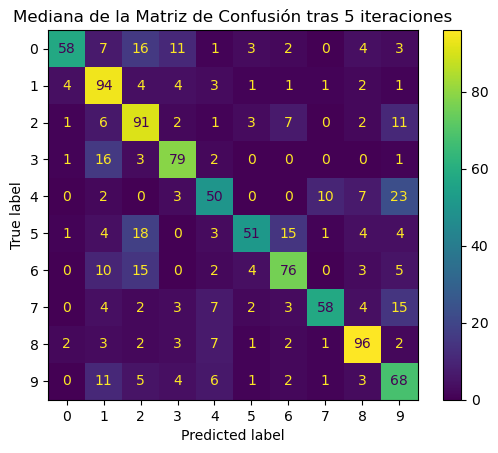

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.81818182 0.55294118 0.6013986  0.68103448 0.55555556 0.79032258
 0.68571429 0.65116279 0.80672269 0.49275362]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6278


In [41]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-10
# Se cambia la función de activación 2 y 3 a ELU
results_mlp2RE, median_mlp2RE, median_class_accuracies_mlp2RE = trainAndEvaluate(2, X_train, y_train, X_test, y_test, 
                                                                          ['relu','elu', 'elu'], 'categorical_crossentropy', [256, 256, 256])

<h3>Modificación de Función de Activación 1 y 3 de ReLU a ELU en Modelo MLP 3 usando QuickDraw-10</h3>
Para el modelo MLP 3, se realizan cambios en la función de activación 1 y 3, ambas pasando de ReLU a ELU. Se puede ver un aumento de la mediana de la accuracy total, pasando de 0,6072 a 0,6475.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6332 - loss: 1.1721
Iteración 0 - Accuracy Total: 0.6475128531455994
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 0 : [0.825      0.485      0.76136364 0.74       0.49382716 0.71764706
 0.61068702 0.84615385 0.6918239  0.61428571]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 1.1959
Iteración 1 - Accuracy Total: 0.6003430485725403
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 1 : [0.74747475 0.43612335 0.6504065  0.73684211 0.47916667 0.75384615
 0.71428571 0.65656566 0.75757576 0.44186047]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 1.2247
Iteración 2 - Accuracy Total: 0.6535162925720215
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 2 : [0.80722892 0.60365854 0.73958333 0.74747475 0.50909091 0.78082192
 0.75238095 0.73831776 0.76470588 0.39378238]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.50

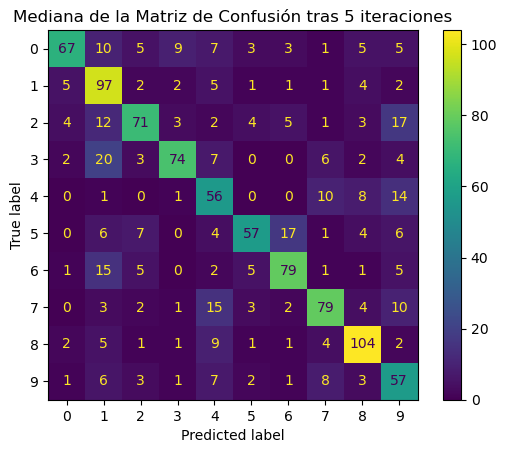

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.80722892 0.485      0.69135802 0.74747475 0.48571429 0.73239437
 0.69565217 0.65656566 0.75757576 0.47482014]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6475


In [42]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-10
# Se cambia la función de activación 1 y 3 a ELU
results_mlp3RE, median_mlp3RE, median_class_accuracies_mlp3RE = trainAndEvaluate(3, X_train, y_train, X_test, y_test, 
                                                                        ['elu','relu', 'elu', 'relu'], 'categorical_crossentropy',[512, 256, 128, 64])

De los resultados anteriores se puede desprender que se obtiene una mejor accuracy al combinar las funciones de activación ReLU con ELU. Esto tiene sentido, sobretodo considerando que Sigmoid no es una función adecuada en el problema de clasificación de imágenes.

<h3>Modificación de Número de Neuronas al doble en Modelo MLP1 usando QuickDraw-10</h3>
Para el modelo MLP 1, se aumenta el número de neuronas de 128 y 64 a 256 y 128 respectivamente. Se puede ver que la mediana de la accuracy disminuye considerablemente, bajando de 0,6038 a 0,1046.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1945 - loss: 2.3031     
Iteración 0 - Accuracy Total: 0.1046312153339386
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [       nan 0.10463122        nan        nan        nan        nan
        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1945 - loss: 2.3032     
Iteración 1 - Accuracy Total: 0.1046312153339386
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [       nan 0.10463122        nan        nan        nan        nan
        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.1945 - loss: 2.3033   
Iteración 2 - Accuracy Total: 0.1046312153339386
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [       nan 0.10463122        nan        nan        nan        nan
        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.1945 - loss: 2.3027   
Iteración 3 - Accuracy Total: 0.1046312153339386
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 3 : [       nan 0.10463122        nan        nan        nan        nan
        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.1945 - loss: 2.3024   
Iteración 4 - Accuracy Total: 0.1046312153339386
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 4 : [       nan 0.10463122        nan        nan        nan        nan
        nan        nan        nan        nan]
-------------------------------------



C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


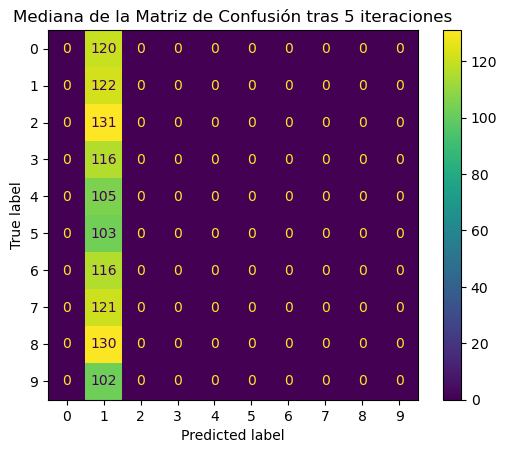

Mediana de la Accuracy por Clase en 5 Iteraciones: [       nan 0.10463122        nan        nan        nan        nan
        nan        nan        nan        nan]
Mediana de la Accuracy Total en 5 Iteraciones: 0.1046


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:67: RuntimeWarning: All-NaN slice encountered
  median_class_accuracies = np.nanmedian(class_accuracies, axis=0)


In [43]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-10. 
# Se cambian el número de neuronas a 256 y 128 (doble de las originales).
results_mlp1NN, median_mlp1NN, median_class_accuracies_mlp1NN = trainAndEvaluate(1, X_train, y_train, X_test, y_test,  
                                                                                 ['relu','sigmoid'], 'sparse_categorical_crossentropy',[256,128])

<h3>Modificación de Número de Neuronas al doble en Modelo MLP 2 usando QuickDraw-10</h3>
Para el modelo MLP 2, se aumenta el número de neuronas de 256 a 512 en todas las capas ocultas. Se puede ver que la mediana de la accuracy aumena levemente, cambiando de 0,6184 a 0,6278.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5720 - loss: 1.3646
Iteración 0 - Accuracy Total: 0.6277872920036316
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.84782609 0.56804734 0.69298246 0.61333333 0.44202899 0.66666667
 0.7008547  0.91071429 0.82300885 0.45294118]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6437 - loss: 1.1812
Iteración 1 - Accuracy Total: 0.6072041392326355
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy por cada clase en Iteración 1 : [0.78571429 0.51813472 0.71028037 0.85       0.36666667 0.61111111
 0.76       0.96153846 0.79527559 0.41860465]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 1.0520
Iteración 2 - Accuracy Total: 0.6578044891357422
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 2 : [0.7        0.70967742 0.69444444 0.73913043 0.47619048 0.65656566
 0.61029412 0.86885246 0.7751938  0.50393701]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.61

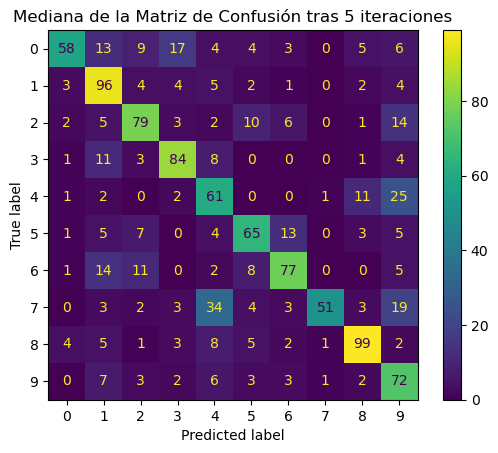

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.82857143 0.56804734 0.69298246 0.73043478 0.47619048 0.65656566
 0.7008547  0.89285714 0.77952756 0.45294118]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6278


In [44]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-10
# Se cambia el número de neuronas a 512 (doble de las originales)
results_mlp2NN, median_mlp2NN, median_class_accuracies_mlp2NN = trainAndEvaluate(2, X_train, y_train, X_test, y_test, 
                                                                          ['relu','relu', 'relu'], 'categorical_crossentropy', [512, 512, 512])

<h3>Modificación de Número de Neuronas al doble en Modelo MLP 3 usando QuickDraw-10</h3>
Para el modelo MLP 3, se aumenta el número de neuronas de 512, 256, 128 y 64 a 1024, 512, 256 y 128 respectivamente. Se puede ver que la mediana de la accuracy aumenta, cambiando de 0,6072 a 0,6501.

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 1.1802
Iteración 0 - Accuracy Total: 0.6518010497093201
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy por cada clase en Iteración 0 : [0.85185185 0.65384615 0.60689655 0.57714286 0.57746479 0.7
 0.86538462 0.64233577 0.72222222 0.52671756]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6330 - loss: 1.1884
Iteración 1 - Accuracy Total: 0.6500857472419739
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy por cada clase en Iteración 1 : [0.88732394 0.55376344 0.72727273 0.83333333 0.50666667 0.7125
 0.71818182 0.86111111 0.72483221 0.38308458]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4736 - loss: 1.6964
Iteración 2 - Accuracy Total: 0.5677530169487
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy por cada clase en Iteración 2 : [0.85714286 0.44594595 0.63333333 0.52247191 0.49275362 0.64130435
 0.63541667 0.73404255 0.80373832 0.41954023]
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4983 - loss: 1.5

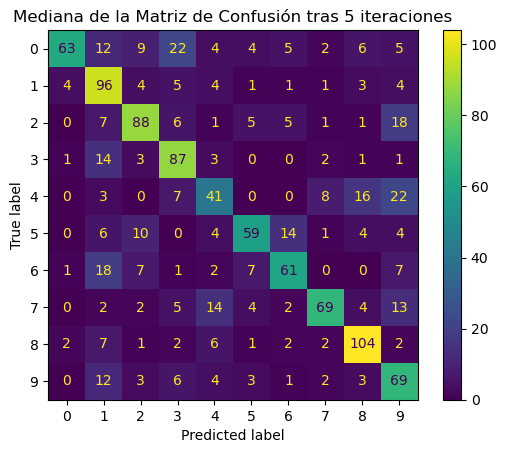

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.85714286 0.55376344 0.64761905 0.57714286 0.49275362 0.69230769
 0.7012987  0.76344086 0.72483221 0.44897959]
Mediana de la Accuracy Total en 5 Iteraciones: 0.6501


In [45]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-10.
# Se cambia el número de neuronas a 1024, 512, 256 y 128 (doble de las originales).
results_mlp3NN, median_mlp3NN, median_class_accuracies_mlp3NN = trainAndEvaluate(3, X_train, y_train, X_test, y_test, 
                                                                        ['relu','relu', 'relu', 'relu'], 'categorical_crossentropy',
                                                                                 [1024, 512, 256, 128])

El aumento del número de neuronas beneficia a los modelos MLP 2 y 3, pero es totalmente lo contrario con el modelo MLP 1 al utilizar QuickDraw-10. Esto puede deberse a varios factores, como los pesos aleatorios, la arquitectura de los modelos, entre otros.

<h2>EXPERIMENTO 2: SUBCONJUNTO DE DATOS "QUICKDRAW-ANIMALS"</h2>
El conjunto de datos QuickDraw-Animals tiene 12 clases, las cuales son las siguientes:

* <b>sheep:</b> Clase 0
* <b>bear:</b> Clase 1
* <b>bee:</b> Clase 2
* <b>cat:</b> Clase 3
* <b>camel:</b> Clase 4
* <b>cow:</b> Clase 5
* <b>crab:</b>	Clase 6
* <b>crocodile:</b> Clase 7
* <b>duck:</b> Clase 8
* <b>elephant:</b> Clase 9
* <b>dog:</b> Clase 10
* <b>giraffe:</b> Clase 11

<h3>Lectura de datos del subconjunto de datos QuickDraw-Animals </h3>

Se define la función <b>loadAnimalsImages()</b> para cargar las imágenes y sus etiquetas correspondientes.

In [46]:
'''
Entradas: La ruta a la carpeta que contiene las subcarpetas de clase y un diccionario que mapea nombres de clases (str) a índices de clases (int)
Salidas: Un arreglo de Numpy de imágenes cargadas y redimensionadas y un arreglo de numpy de etiquetas asociadas a las imágenes.
Descripción: Función que recorre las subcarpetas y  carga las imágenes de cada subcarpeta, las redimensiona y las convierte a arrays.
Luego las etiquetas se asignan según mapping.txt, que mapea el nombre de la clase al índice de la clase.
'''
def loadAnimalsImages(folder_path, class_mapping, target_size=(64, 64)):
    images = []
    labels = []
    # Se itera sobre cada clase y su índice en el mapeo de clases
    for class_name, class_index in class_mapping.items():
        # Se construye la ruta de la subcarpeta de la clase
        class_folder = os.path.join(folder_path, class_name)
        
        # Se verifica si la subcarpeta existe
        if os.path.isdir(class_folder):
            # Si es asi, se itera sobre cada archivo en la subcarpeta de la clase
            for filename in os.listdir(class_folder):
                # Se construye la ruta completa de la imagen
                img_path = os.path.join(class_folder, filename)
                
                # Se carga la imágen
                img = load_img(img_path, target_size=target_size, color_mode='grayscale')
                img_array = img_to_array(img)
                
                # Se agregan las imágenes a las listas correspondientes
                images.append(img_array)
                labels.append(class_index)
    
    # Se convierten las listas en arreglos de NumPy
    return np.array(images), np.array(labels)

Primero, se establece la ruta base del conjunto de datos y se lee el archivo mapping.txt, el cual asocia nombres de clases con índices numéricos. Luego, se utiliza la función <b>loadAnimalsImages()</b> para cargar y redimensionar las imágenes de entrenamiento y prueba desde las carpetas correspondientes. Las imágenes se normalizan y se asegura de que las etiquetas sean de tipo int. Finalmente, se verifica que se han cargado las imágenes correctamente. Los datos de entrenamiento 12000 imágenes y los datos de prueba son 2399 imágenes.

In [47]:
# Se establece la ruta base del conjunto de datos QuickDraw-Animals
base_path = "QuickDraw-Animals"

# Se lee el archivo mapping.txt
mapping_path = os.path.join(base_path, "mapping.txt")
mapping = pd.read_csv(mapping_path, sep='\t', header=None, names=['label', 'index'])
class_mapping = dict(zip(mapping['label'], mapping['index']))

# Se construyen las rutas de las imágenes de entrenamiento y prueba
train_folder = os.path.join(base_path, "train_images")
test_folder = os.path.join(base_path, "test_images")

# Se cargan las imágenes de entrenamiento y prueba
X_train, y_train = loadAnimalsImages(train_folder, class_mapping)
X_test, y_test = loadAnimalsImages(test_folder, class_mapping)

# Se normalizan las imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0

# Se verifica que las etiquetas sean formato entero (Para Sparse Categorical Cross-Entropy)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Se verifica que los datos se hayan cargado correctamente
print("Datos de entrenamiento cargados: ", X_train.shape)
print("Datos de prueba cargados: ", X_test.shape)

Datos de entrenamiento cargados:  (12000, 64, 64, 1)
Datos de prueba cargados:  (2399, 64, 64, 1)


<h3>Visualización de algunas de las imágenes obtenidas usando QuickDraw-Animals</h3>

Se vuelve a utilizar la función <b>plotRandomImages()</b> para asi poder mostrar las imágenes obtenidas desde el dataset QuickDraw-Animals.

Imágenes aleatorias del conjunto de entrenamiento:


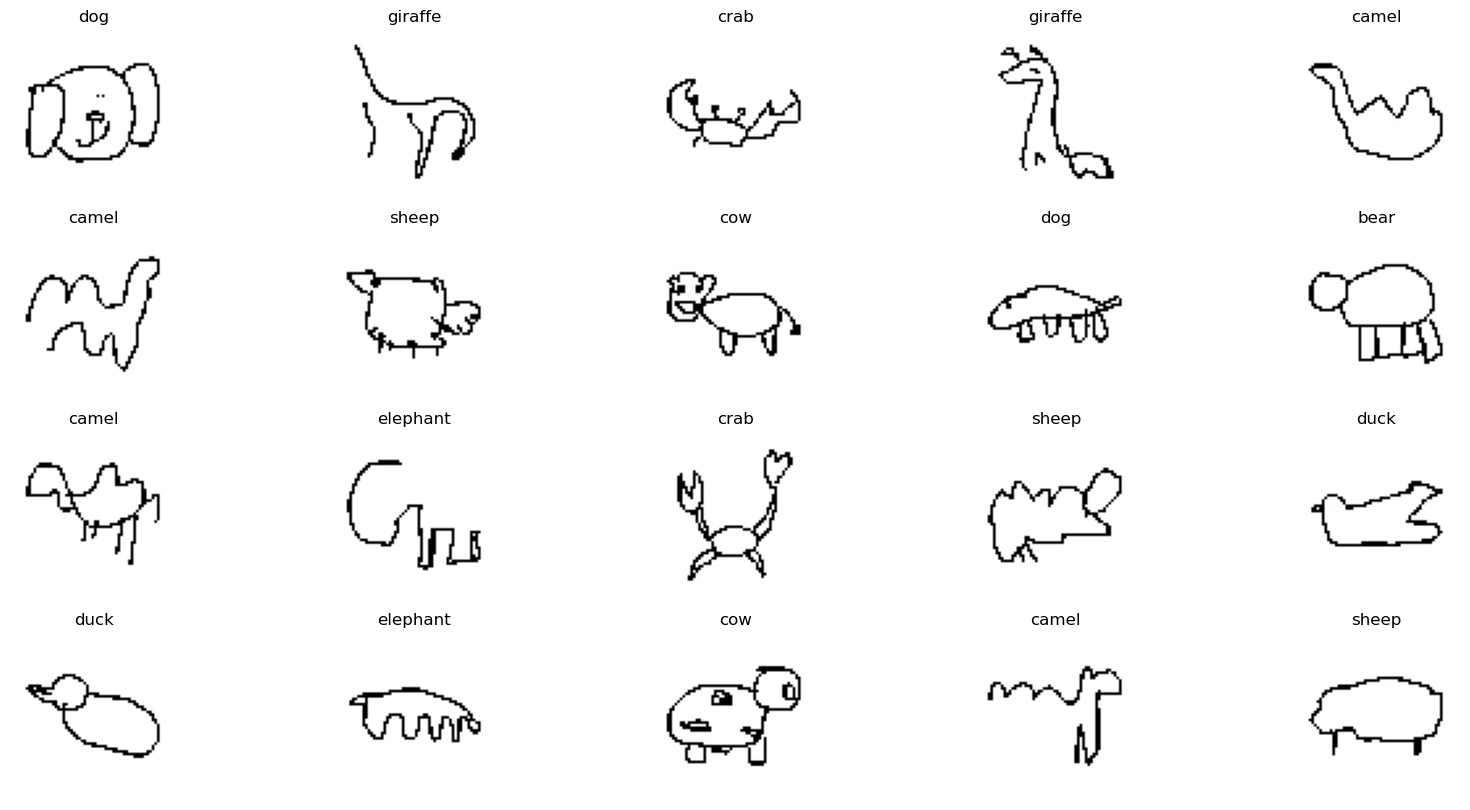

Imágenes aleatorias del conjunto de prueba:


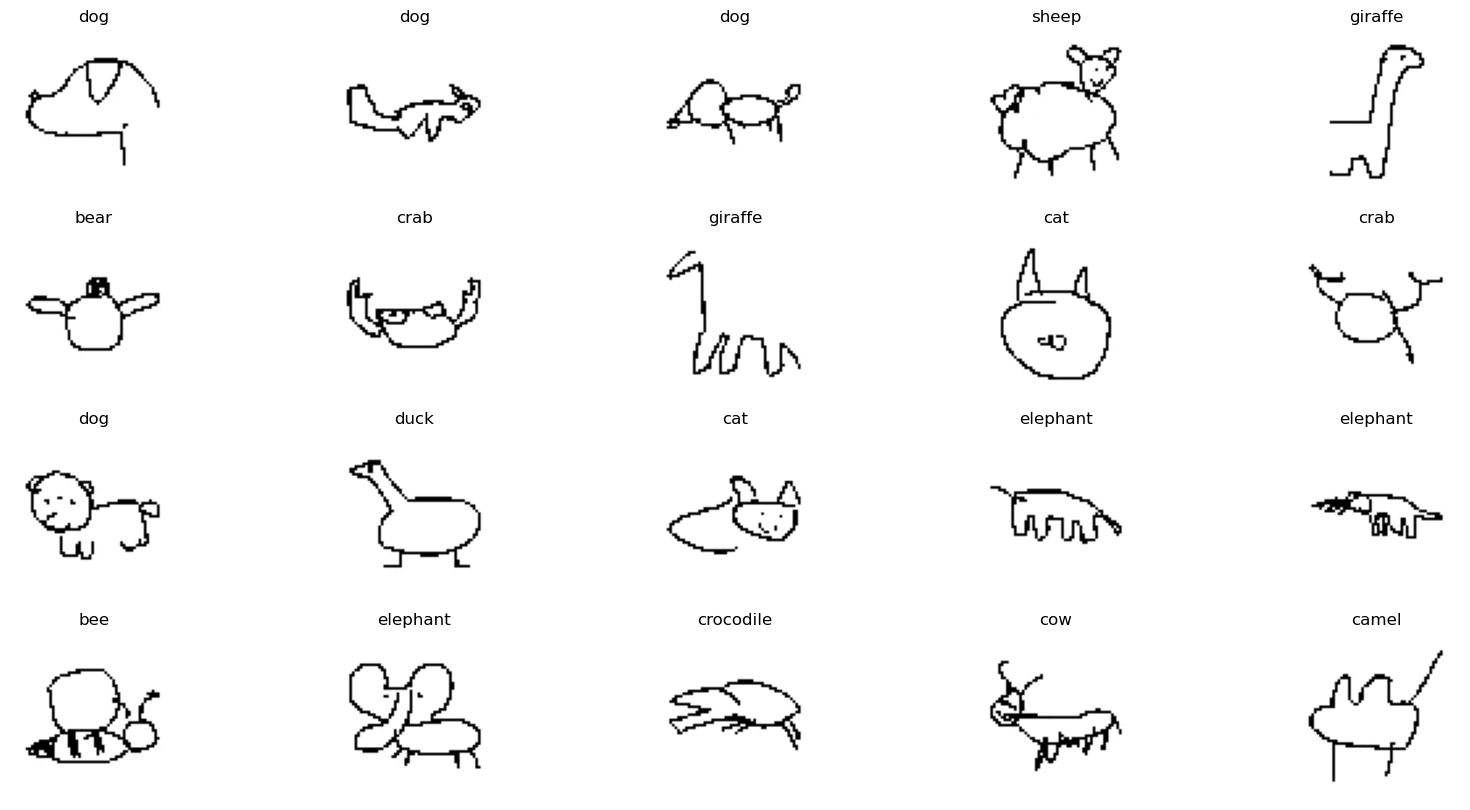

In [48]:
# Se muestran 20 imágenes aleatorias del conjunto de entrenamiento
print("Imágenes aleatorias del conjunto de entrenamiento:")
plotRandomImages(X_train, y_train, class_mapping, num_images=20)

# Se muestran 20 imágenes aleatorias del conjunto de prueba
print("Imágenes aleatorias del conjunto de prueba:")
plotRandomImages(X_test, y_test, class_mapping, num_images=20)

<h3>Creación, entrenamiento y evaluación de modelos MLP usando QuickDraw-Animals</h3>

Se utiliza función <b>trainAndEvaluate()</b> para poder realizar el proceso de entrenamiento y evaluación del modelo, junto con obtener la matriz de confusión y las métricas como Accuracy. Para poder entrenar y definir el modelo es necesario definir el shape de entrada y el número de clases a utilizar, este último corresponde a 12 clases.

In [49]:
# Definir el shape de entrada y el número de clases
input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

<h3>Entrenamientos, evaluaciones y matrices de confusión del MLP 1 usando QuickDraw-Animals</h3>

Se realiza el llamado a la función <b>trainAndEvaluate()</b> usando el <b>MLP de dos capas ocultas</b>. Se puede ver a continuación los resultados en cada iteración, es decir, los valores de accuracy total y por clase. Al final, se muestra la mediana de la matriz de confusión, la mediana de la accuracy total y la mediana de la accuracy por cada clase.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.0659 - loss: 2.4675 
Iteración 0 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 0 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.0659 - loss: 2.4671 
Iteración 1 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 1 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.4453 - loss: 1.7581
Iteración 2 - Accuracy Total: 0.4631096422672272
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 2 : [0.61111111 0.63076923 0.43302181 0.47260274 0.41052632 0.2775
 0.43654822 0.72527473 0.37444934 0.39267016 0.3        0.70564516]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.0659 - loss: 2.4671 
Iteración 3 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 3 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.0659 - loss: 2.4671 
Iteración 4 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 4 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]
-------------------------------------



C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


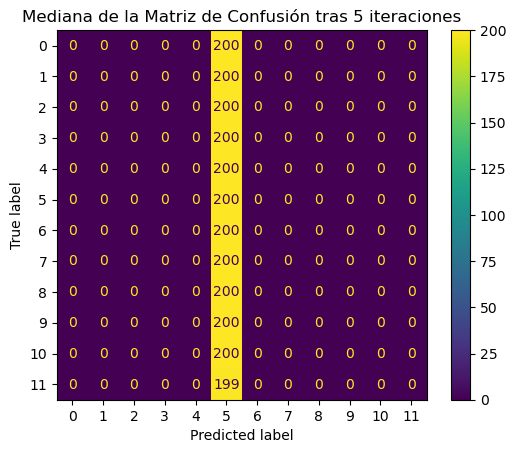

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.61111111 0.63076923 0.43302181 0.47260274 0.41052632 0.08336807
 0.43654822 0.72527473 0.37444934 0.39267016 0.3        0.70564516]
Mediana de la Accuracy Total en 5 Iteraciones: 0.0834


In [50]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-10
results_mlp1, median_mlp1, median_class_accuracies_mlp1 = trainAndEvaluate(1, X_train, y_train, X_test, y_test, 
                                                                           ['relu','sigmoid'], 'sparse_categorical_crossentropy',[128,64])

<h3>Gráfico de Accuracy Total por cada iteración del Modelo MLP 1 usando QuickDraw-Animals</h3>

Se crea y utiliza la función <b>createTotalAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la accuracy total obtenida por cada iteración.

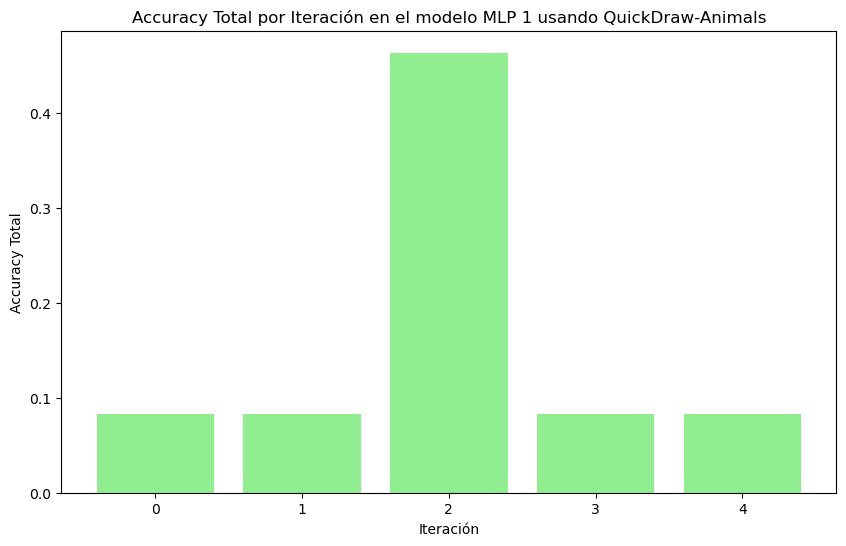

In [51]:
# Se crea y muestra el gráfico de barras asociado a cada iteración
createTotalAccuracyPlot(results_mlp1,1, 'QuickDraw-Animals')

<h3>Gráfico de la Mediana de la Accuracy por cada clase del Modelo MLP 1 usando QuickDraw-Animals</h3>
Se utiliza la función <b>createClassAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la mediana de la accuracy obtenida por cada clase.


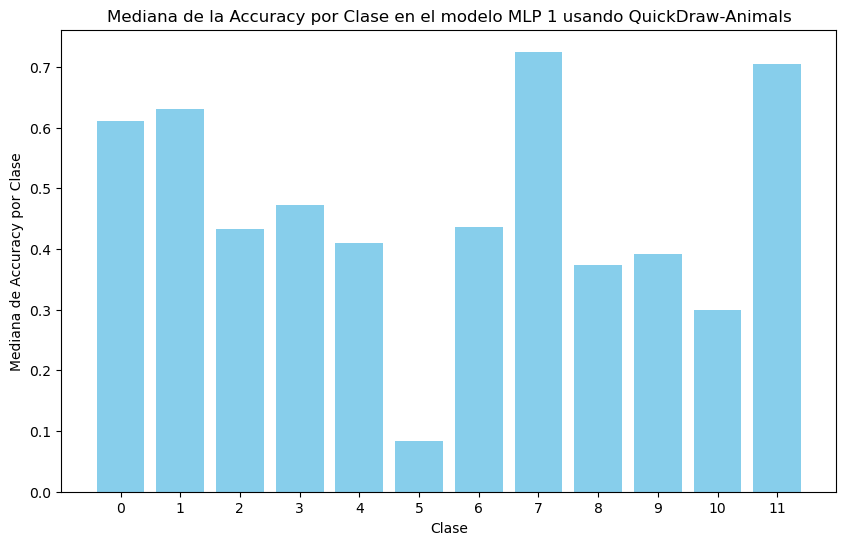

In [52]:
# Se crea y muestra el gráfico de barras asociado a cada clase del Modelo MLP 1
createClassAccuracyPlot(median_class_accuracies_mlp1, 1, 'QuickDraw-Animals')

<h3>Entrenamientos, evaluaciones y matrices de confusión del MLP 2 usando QuickDraw-Animals</h3>

Se realiza el llamado a la función <b>trainAndEvaluate()</b> usando el <b>MLP de tres capas ocultas</b>. Se puede ver a continuación los resultados en cada iteración, es decir, los valores de accuracy total y por clase. Al final, se muestra la mediana de la matriz de confusión, la mediana de la accuracy total y la mediana de la accuracy por cada clase.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3631 - loss: 1.9141
Iteración 0 - Accuracy Total: 0.28720301389694214
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 0 : [0.26315789 0.23255814 0.53333333 0.12820513 0.25       0.2173913
 0.20164609 0.25733634 0.18857143 0.18137255 0.17073171 0.78915663]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3843 - loss: 1.8463
Iteración 1 - Accuracy Total: 0.36723634600639343
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 1 : [0.3862069  0.38738739 0.46190476 0.31914894 0.30434783 0.25
 0.29946524 0.49824561 0.2244898  0.21812081 0.19791667 0.77272727]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4620 - loss: 1.6385
Iteración 2 - Accuracy Total: 0.4139224588871002
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.45149254 0.52564103 0.47272727 0.27037037 0.25443787 0.23713647
 0.37719298 0.76923077 0.42352941 0.61666667 0.21875    0.9357

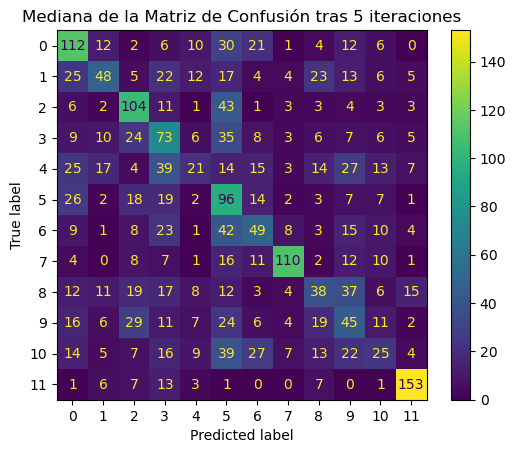

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.45149254 0.44827586 0.46190476 0.25163399 0.25443787 0.23713647
 0.29946524 0.76923077 0.31496063 0.21812081 0.20930233 0.77272727]
Mediana de la Accuracy Total en 5 Iteraciones: 0.3618


In [53]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-Animals
results_mlp2, median_mlp2, median_class_accuracies_mlp2 = trainAndEvaluate(2, X_train, y_train, X_test, y_test, 
                                                                          ['relu','relu', 'relu'], 'categorical_crossentropy', [256, 256, 256])

<h3>Gráfico de Accuracy Total por cada iteración del Modelo MLP 2 usando QuickDraw-Animals</h3>

Se utiliza la función <b>createTotalAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la accuracy total obtenida por cada iteración.

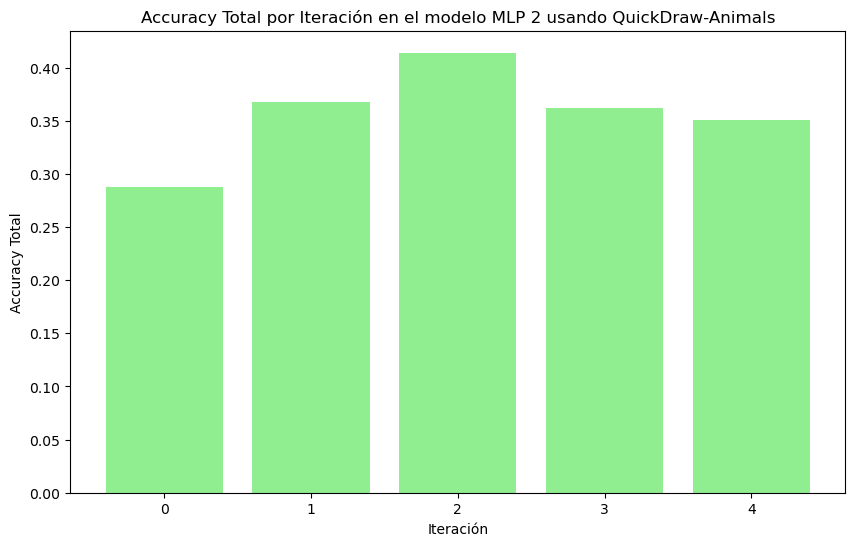

In [54]:
# Se crea y muestra el gráfico de barras asociado a cada iteración
createTotalAccuracyPlot(results_mlp2, 2, 'QuickDraw-Animals')

<h3>Gráfico de la Mediana de la Accuracy por cada clase del Modelo MLP 2 usando QuickDraw-Animals</h3>
Se utiliza la función <b>createClassAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la accuracy obtenida por cada clase.

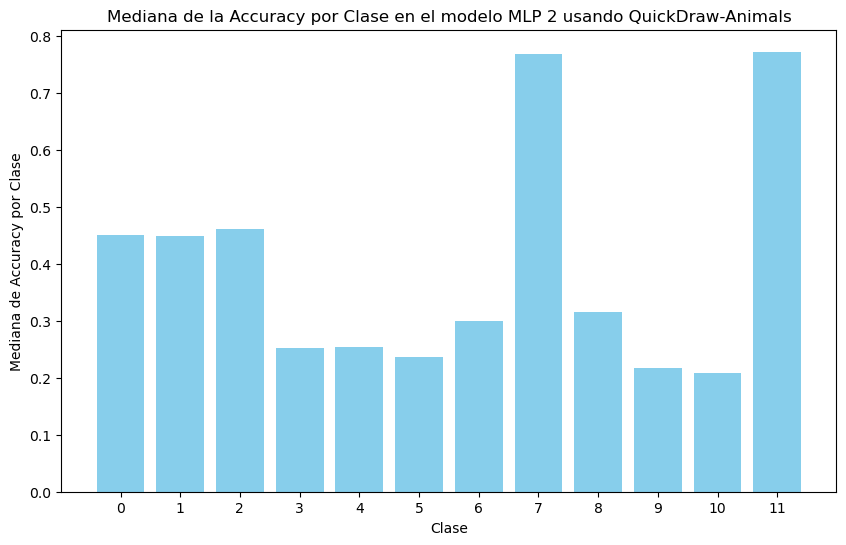

In [55]:
# Se crea y muestra el gráfico de barras asociado a cada clase del Modelo MLP 2
createClassAccuracyPlot(median_class_accuracies_mlp2, 2, 'QuickDraw-Animals')

<h3>Entrenamientos, evaluaciones y matrices de confusión del MLP 3 con QuickDraw-Animals</h3>

Se realiza el llamado a la función <b>trainAndEvaluate()</b> usando el <b>MLP de cuatro capas ocultas</b>. Se puede ver a continuación los resultados en cada iteración, es decir, los valores de accuracy total y por clase. Al final, se muestra la mediana de la matriz de confusión, la mediana de la accuracy total y la mediana de la accuracy por cada clase.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4155 - loss: 1.8255
Iteración 0 - Accuracy Total: 0.42017507553100586
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.6137931  0.58947368 0.43478261 0.28373702 0.32323232 0.27067669
 0.54464286 0.70879121 0.30357143 0.28063241 0.25       0.87647059]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4606 - loss: 1.7485
Iteración 1 - Accuracy Total: 0.4139224588871002
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.49090909 0.54744526 0.34292035 0.31985294 0.5        0.2679558
 0.5        0.92045455 0.36702128 0.36363636 0.23737374 0.93846154]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4617 - loss: 1.7022
Iteración 2 - Accuracy Total: 0.4406002461910248
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.51754386 0.57664234 0.48290598 0.43150685 0.28528529 0.32631579
 0.57971014 0.63809524 0.32835821 0.27576602 0.24       0

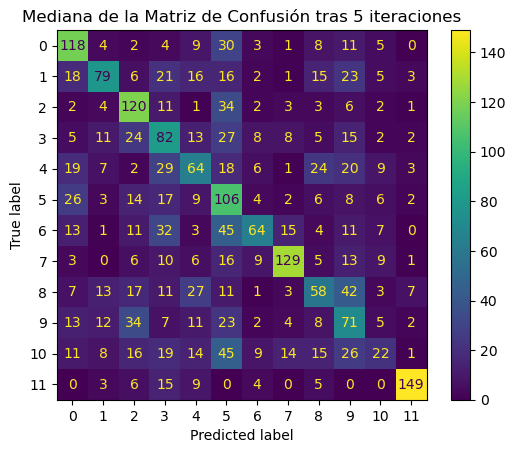

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.5        0.54744526 0.44814815 0.31985294 0.35       0.27067669
 0.51492537 0.70879121 0.36702128 0.32278481 0.25       0.87647059]
Mediana de la Accuracy Total en 5 Iteraciones: 0.4406


In [56]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-Animals
results_mlp3, median_mlp3, median_class_accuracies_mlp3 = trainAndEvaluate(3, X_train, y_train, X_test, y_test, 
                                                                        ['relu','relu', 'relu', 'relu'], 'categorical_crossentropy',[512, 256, 128, 64])

<h3>Gráfico de Accuracy Total por cada iteración del Modelo MLP 3 usando QuickDraw-Animals</h3>

Se utiliza la función <b>createTotalAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la accuracy total obtenida por cada iteración.

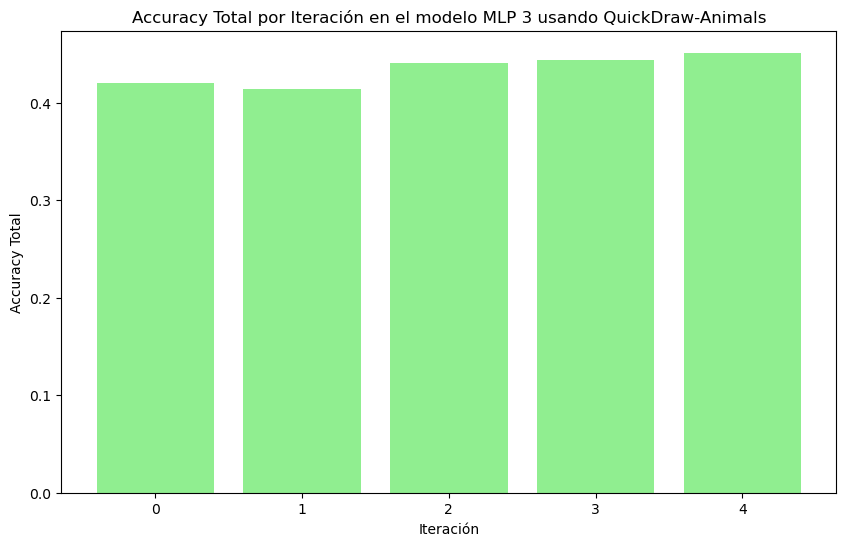

In [57]:
# Se crea y muestra el gráfico de barras asociado a cada iteración
createTotalAccuracyPlot(results_mlp3, 3, 'QuickDraw-Animals')

<h3>Gráfico de la Mediana de la Accuracy por cada clase del Modelo MLP 3 usando QuickDraw-Animals</h3>
Se utiliza la función <b>createClassAccuracyPlot()</b> para crear y mostrar un gráfico que muestra la mediana de la accuracy obtenida por cada clase.

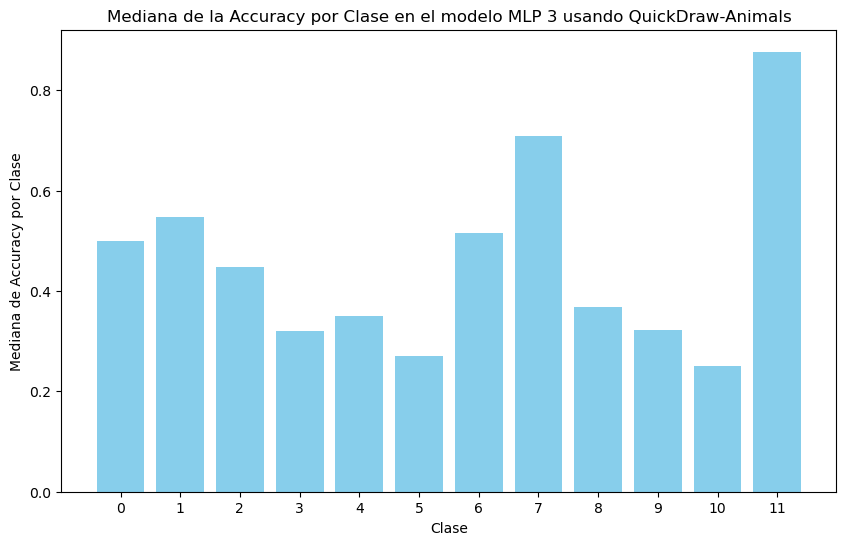

In [58]:
# Se crea y muestra el gráfico de barras asociado a cada clase del Modelo MLP 3
createClassAccuracyPlot(median_class_accuracies_mlp3, 3, 'QuickDraw-Animals')

<h3>Comparación entre los modelos MLP usando el subconjunto QuickDraw-Animals</h3>

Con los modelos ya evaluados y similar a lo realizado en QuickDraw-10, se pueden obtener tablas y gráficos que nos permitan comparar los valores de Accuracy obtenidos.

<h3>Tabla de Accuracy Total por cada modelo e iteración usando QuickDraw-Animals</h3>
Utilizando Pandas y la función <b>createDataTable()</b>, se crea un dataframe para registrar los valores de accuracy total correspondiente a los tres modelos en cada iteración. results_mlpx representa las accuracies obtenidas en cada modelo MLP X, con X siendo 1, 2 o 3 dependiendo del modelo.

In [59]:
# Se crea una tabla (dataframe) que contiene la accuracy total de cada modelo e iteración
createDataTable('AccuracyTotalMLP1', results_mlp1, 'AccuracyTotalMLP2', results_mlp2, 'AccuracyTotalMLP3', results_mlp3)

,AccuracyTotalMLP1,AccuracyTotalMLP2,AccuracyTotalMLP3
0,0.083368,0.287203,0.420175
1,0.083368,0.367236,0.413922
2,0.463110,0.413922,0.440600
3,0.083368,0.361817,0.443518
4,0.083368,0.350980,0.451438


<h3>Tabla de la Mediana de la Accuracy por cada Clase usando QuickDraw-Animals</h3>
Utilizando Pandas y la función <b>createDataTable()</b>, se crea un dataframe para registrar los valores de accuracy de cada mediana de accuracy obtenida por clase asociada a cada modelo. median_class_accuracies_mlpX representa las accuracy por clase obtenidas en el modelo X, con X siendo 1, 2 o 3 dependiendo del modelo.

In [60]:
# Se crea una tabla (dataframe) que contiene la mediana la accuracy por cada clase
createDataTable('MedianaAccuracyClaseMLP1', median_class_accuracies_mlp1, 'MedianaAccuracyClaseMLP2', median_class_accuracies_mlp2, 
                'MedianaAccuracyClaseMLP3', median_class_accuracies_mlp3)

,MedianaAccuracyClaseMLP1,MedianaAccuracyClaseMLP2,MedianaAccuracyClaseMLP3
0,0.611111,0.451493,0.500000
1,0.630769,0.448276,0.547445
2,0.433022,0.461905,0.448148
3,0.472603,0.251634,0.319853
4,0.410526,0.254438,0.350000
5,0.083368,0.237136,0.270677
6,0.436548,0.299465,0.514925
7,0.725275,0.769231,0.708791
8,0.374449,0.314961,0.367021
9,0.392670,0.218121,0.322785


<h3>Gráfico de la Mediana de la Accuracy de cada modelo MLP usando QuickDraw-Animals</h3>
Se utiliza la función <b>createMedianAccuracyPlot()</b> para poder comparar los valores de la mediana de la accuracy total de cada modelo.

Mediana de la Accuracy Total tras 5 iteraciones de MLP 1: 0.0834
Mediana de la Accuracy Total tras 5 iteraciones de MLP 2: 0.3618
Mediana de la Accuracy Total tras 5 iteraciones de MLP 3: 0.4406


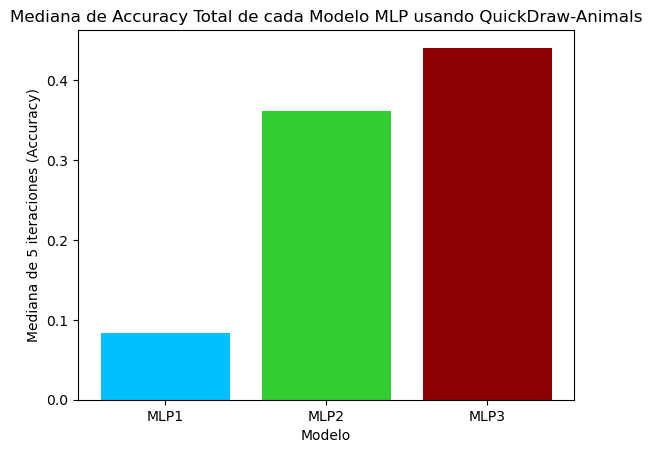

In [61]:
# Se crea y muestra un gráfico de barras de la mediana de la accuracy total de los modelos MLP
createMedianAccuracyPlot(median_mlp1, median_mlp2, median_mlp3, 'QuickDraw-Animals')

<h3>Gráfico de la Accuracy Total por Iteración de cada modelo MLP usando QuickDraw-Animals</h3>
Se utiliza la función <b>creatAccuracyPlot()</b>, la cual crea un gráfico de barras para comparar los valores accuracy total obtenidos por iteración en cada modelo.

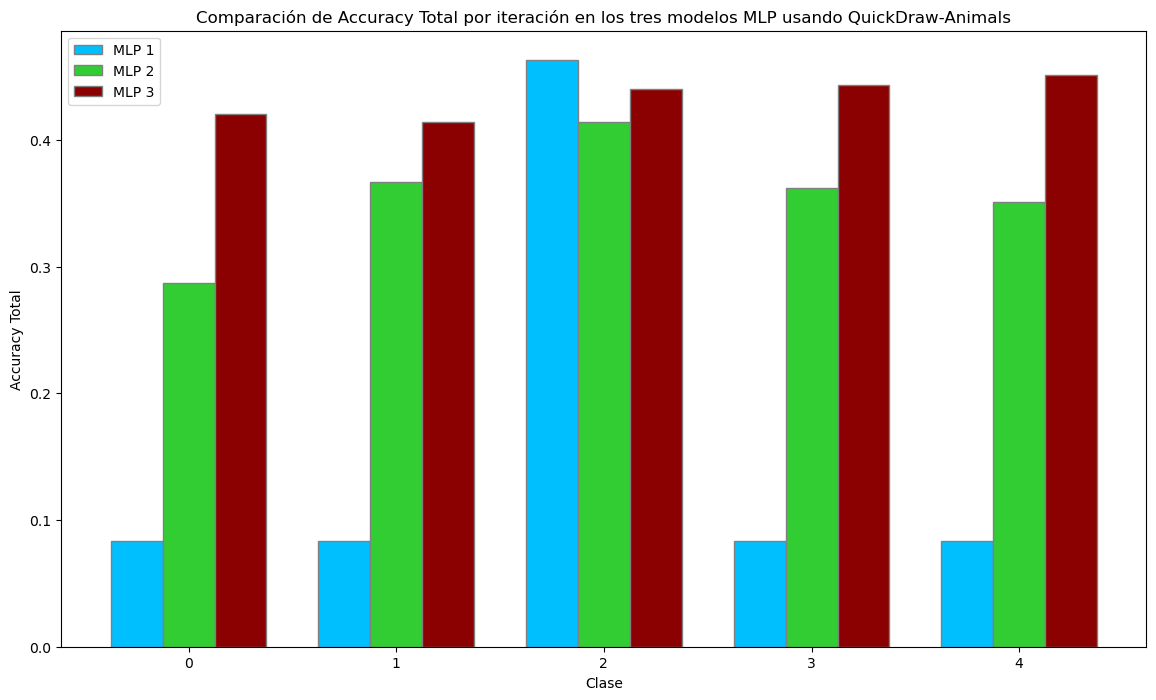

In [62]:
# Se crea un gráfico de barras que compara los valores de Accuracy Total por Iteración de cada modelo MLP
createAccuracyPlot(results_mlp1, results_mlp2, results_mlp3, 'Clase', 'Accuracy Total', 
                   'Comparación de Accuracy Total por iteración en los tres modelos MLP usando QuickDraw-Animals', range(0,5))

<h3>Comparación de la Mediana de la Accuracy por Clase usando QuickDraw-Animals</h3>
Se vuelve a utilizar <b>createAccuracyPlot()</b>, para comparar los valores la mediana de la accuracy por clase obtenidos en cada modelo.

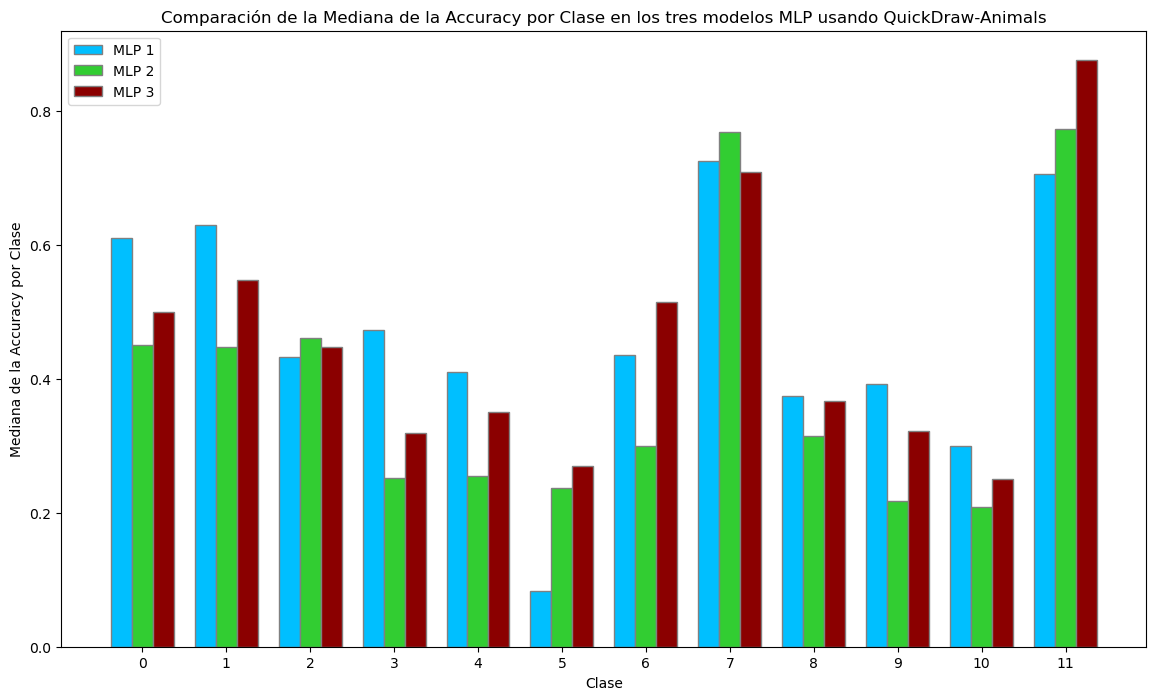

In [63]:
# Se crea un gráfico de barras que compara los valores de la Mediana de la Accuracy por Clase de cada modelo MLP
createAccuracyPlot(median_class_accuracies_mlp1, median_class_accuracies_mlp2, median_class_accuracies_mlp3, 'Clase', 
                   'Mediana de la Accuracy por Clase', 
                   'Comparación de la Mediana de la Accuracy por Clase en los tres modelos MLP usando QuickDraw-Animals', range(0,12))

<h2>MODIFICACIÓN DE HYPERPARAMETROS CON QUICKDRAW-ANIMALS</h2>

Similar a como se hizo en QuickDraw-10, se busca comprobar como cambian los valores de accuracy tras modificar los hyperparametros (epochs y batch size) y las configuraciones de los modelos MLP. A continuación, se realizan pruebas para los experimentos.

<h2>Modificación de epochs y batch size</h2>
En esta parte, solo se modifican los valores de epoch de 20 a 100 y batch size, de 32 a 128, utilizando las configuraciones por defecto de los modelos MLP. En otras palabras, se vuelven a realizar las mismas evaluaciones / entrenamientos ya realizados, pero con un mayor número de epochs y batch size. Se busca comparar principalmente como cambia el valor de la Mediana de la Accuracy Total.

<h3>Modelo MLP 1 con 100 epochs y 128 batch size usando QuickDraw-Animals</h3>
Tras utilizar la función <b>trainAndEvaluate()</b> con 100 epochs y batch size 128, el valor de la mediana de la accuracy total aumenta considerablemente de 0,0834 a 0,4360.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.4620 - loss: 1.8195
Iteración 0 - Accuracy Total: 0.4255940020084381
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 0 : [0.43642612 0.54237288 0.46240602 0.31355932 0.55223881 0.22292994
 0.40909091 0.77777778 0.36051502 0.43609023 0.23684211 0.82608696]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.4404 - loss: 1.9789
Iteración 1 - Accuracy Total: 0.4360150098800659
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 1 : [0.53608247 0.51219512 0.45703125 0.36514523 0.42857143 0.25974026
 0.55445545 0.50177936 0.37168142 0.47777778 0.22321429 0.64772727]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.4517 - loss: 1.9652
Iteración 2 - Accuracy Total: 0.4368487000465393
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 2 : [0.46096654 0.63       0.48701299 0.3079096  0.45283019 0.34972678
 0.6056338  0.52380952 0.33045977 0.39370079 

C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.4990 - loss: 1.6693
Iteración 4 - Accuracy Total: 0.451854944229126
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 4 : [0.47292419 0.43981481 0.48638132 0.39487179 0.4950495  0.41732283
 0.37984496 0.59649123 0.40588235 0.45192308 0.21183801 0.93103448]
-------------------------------------



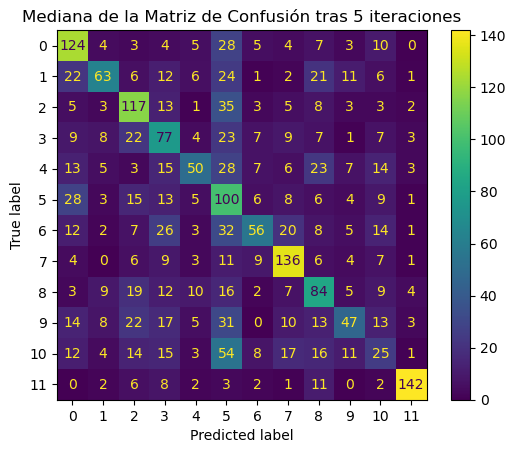

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.46694537 0.527284   0.47439367 0.33935228 0.47393985 0.25974026
 0.48177318 0.56015038 0.36609822 0.44400665 0.2300282  0.85131508]
Mediana de la Accuracy Total en 5 Iteraciones: 0.4360


In [64]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-Animals. Se usan 100 epochs y batch size 128.
results_mlp1EB, median_mlp1EB, median_class_accuracies_mlp1EB = trainAndEvaluate(1, X_train, y_train, X_test, y_test,  
                                                                                 ['relu','sigmoid'], 'sparse_categorical_crossentropy',[128,64],  
                                                                                 epochs=100, batch_size=128)

<h3>Modelo MLP 2 con 100 epochs y 128 batch size usando QuickDraw-Animals</h3>
Tras utilizar la función <b>trainAndEvaluate()</b> con 100 epochs y batch size 128, el valor de la mediana de la accuracy total aumenta de 0,3618 a 0,4494.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4402 - loss: 2.5832
Iteración 0 - Accuracy Total: 0.4464360177516937
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.58928571 0.48076923 0.6        0.29881657 0.43589744 0.35497835
 0.37414966 0.70186335 0.33636364 0.41818182 0.20472441 0.81151832]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4532 - loss: 2.0896
Iteración 1 - Accuracy Total: 0.43351396918296814
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.52403846 0.50769231 0.39506173 0.44623656 0.57142857 0.23798627
 0.39055794 0.57142857 0.54545455 0.40677966 0.18518519 0.88125   ]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5153 - loss: 1.8966
Iteración 2 - Accuracy Total: 0.47644850611686707
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.43076923 0.45108696 0.47555556 0.37442922 0.42424242 0.39247312
 0.44102564 0.70391061 0.39370079 0.48076923 0.30666667

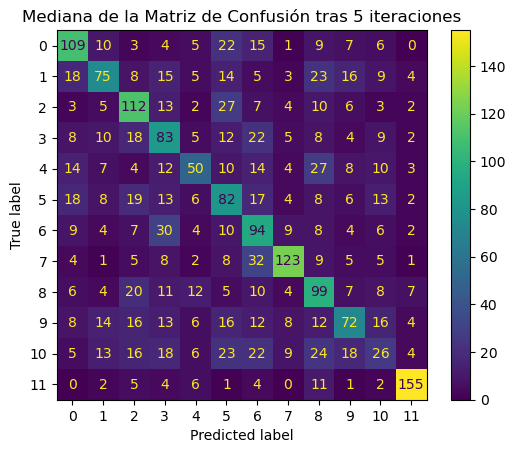

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.52403846 0.48076923 0.47555556 0.37442922 0.44520548 0.35497835
 0.39055794 0.70186335 0.39370079 0.43406593 0.22346369 0.81151832]
Mediana de la Accuracy Total en 5 Iteraciones: 0.4494


In [65]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-Animals. Se usan 100 epochs y batch size 128.
results_mlp2EB, median_mlp2EB, median_class_accuracies_mlp2EB = trainAndEvaluate(2, X_train, y_train, X_test, y_test,
                                                                                  ['relu','relu', 'relu'], 'categorical_crossentropy', [256, 256, 256],
                                                                                 epochs=100, batch_size=128)

<h3>Modelo MLP 3 con 100 epochs y 128 batch size usando QuickDraw-Animals</h3>
Tras utilizar la función <b>trainAndEvaluate()</b> con 100 epochs y batch size 128, el valor de la mediana de la accuracy total aumenta de 0,4406 a 0,4510.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4671 - loss: 2.2366
Iteración 0 - Accuracy Total: 0.4510212540626526
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.53038674 0.47282609 0.5        0.3815261  0.44444444 0.40939597
 0.25       0.7012987  0.47482014 0.578125   0.32075472 0.86413043]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4908 - loss: 1.9425
Iteración 1 - Accuracy Total: 0.43226343393325806
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.53080569 0.30617284 0.42996743 0.35714286 0.44262295 0.26599327
 0.63333333 0.7005988  0.44954128 0.34586466 0.28571429 0.85326087]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4886 - loss: 2.2981
Iteración 2 - Accuracy Total: 0.45268863439559937
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.4494382  0.50967742 0.57286432 0.28070175 0.45901639 0.34666667
 0.33431085 0.7278481  0.47328244 0.55789474 0.24347826

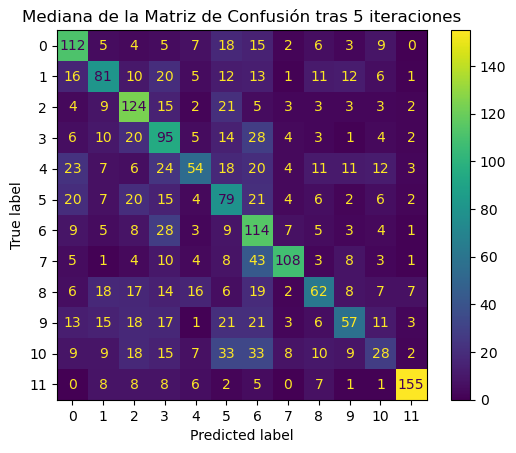

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.50236967 0.47282609 0.4940239  0.35714286 0.44444444 0.34666667
 0.33431085 0.70422535 0.47328244 0.50442478 0.28571429 0.86413043]
Mediana de la Accuracy Total en 5 Iteraciones: 0.4510


In [66]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-Animals. Se usan 100 epochs y batch size 128.
results_mlp3EB, median_mlp3EB, median_class_accuracies_mlp3EB = trainAndEvaluate(3, X_train, y_train, X_test, y_test,
                                                                                  ['relu','relu', 'relu', 'relu'], 'categorical_crossentropy',
                                                                                 [512, 256, 128, 64], epochs=100, batch_size=128)

<h3>Gráficos de Accuracy de modelos MLP con 100 epochs y batch size 128 usando QuickDraw-Animals</h3>
Con los modelos ya evaluados y dado que hubieron notables cambios en los valores de accuracy total, se vuelven a crear los gráficos asociados a los resultados.

Mediana de la Accuracy Total tras 5 iteraciones de MLP 1: 0.4360
Mediana de la Accuracy Total tras 5 iteraciones de MLP 2: 0.4494
Mediana de la Accuracy Total tras 5 iteraciones de MLP 3: 0.4510


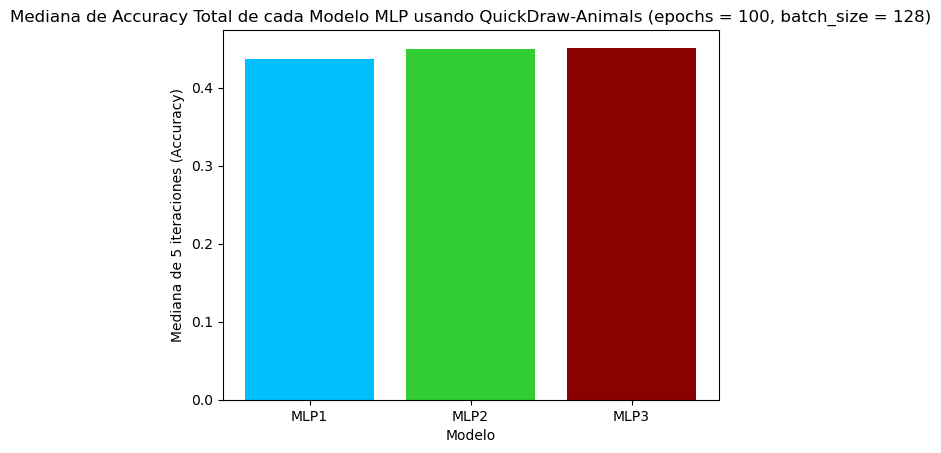

In [67]:
# Se crea y muestra un gráfico de barras de la mediana de la accuracy total de los modelos MLP
createMedianAccuracyPlot(median_mlp1EB, median_mlp2EB, median_mlp3EB, 'QuickDraw-Animals (epochs = 100, batch_size = 128)')

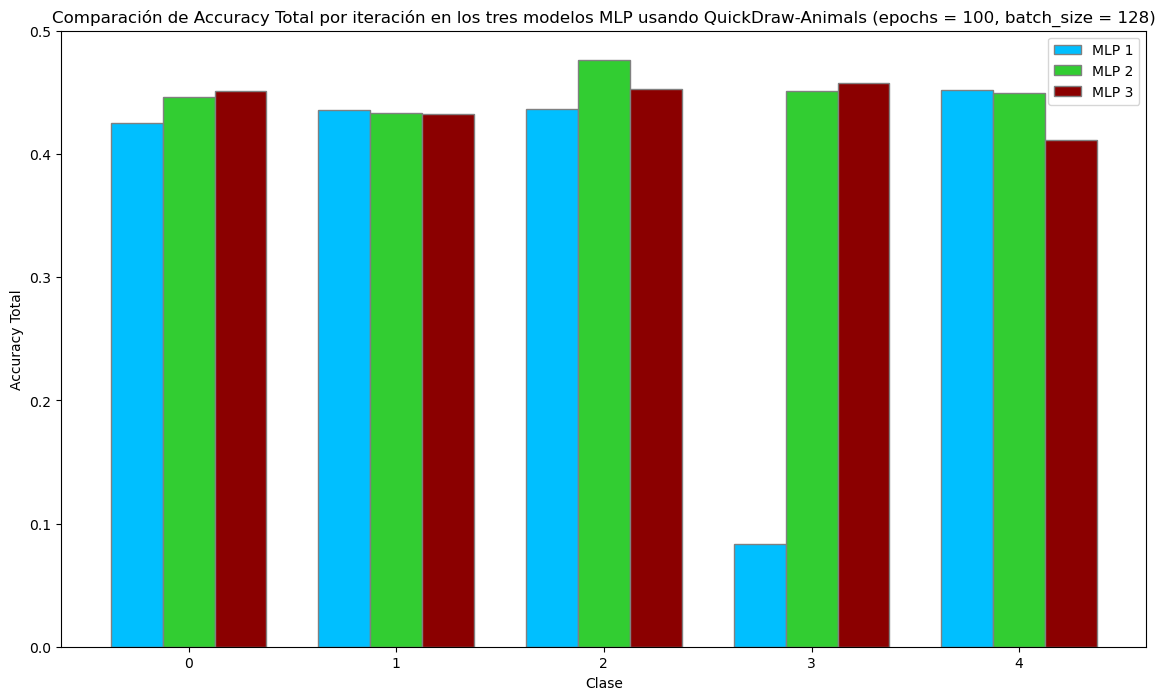

In [68]:
# Se crea un gráfico de barras que compara los valores de Accuracy Total por Iteración de cada modelo MLP
createAccuracyPlot(results_mlp1EB, results_mlp2EB, results_mlp3EB, 'Clase', 'Accuracy Total', 
                   'Comparación de Accuracy Total por iteración en los tres modelos MLP usando QuickDraw-Animals (epochs = 100, batch_size = 128)', 
                   range(0,5))

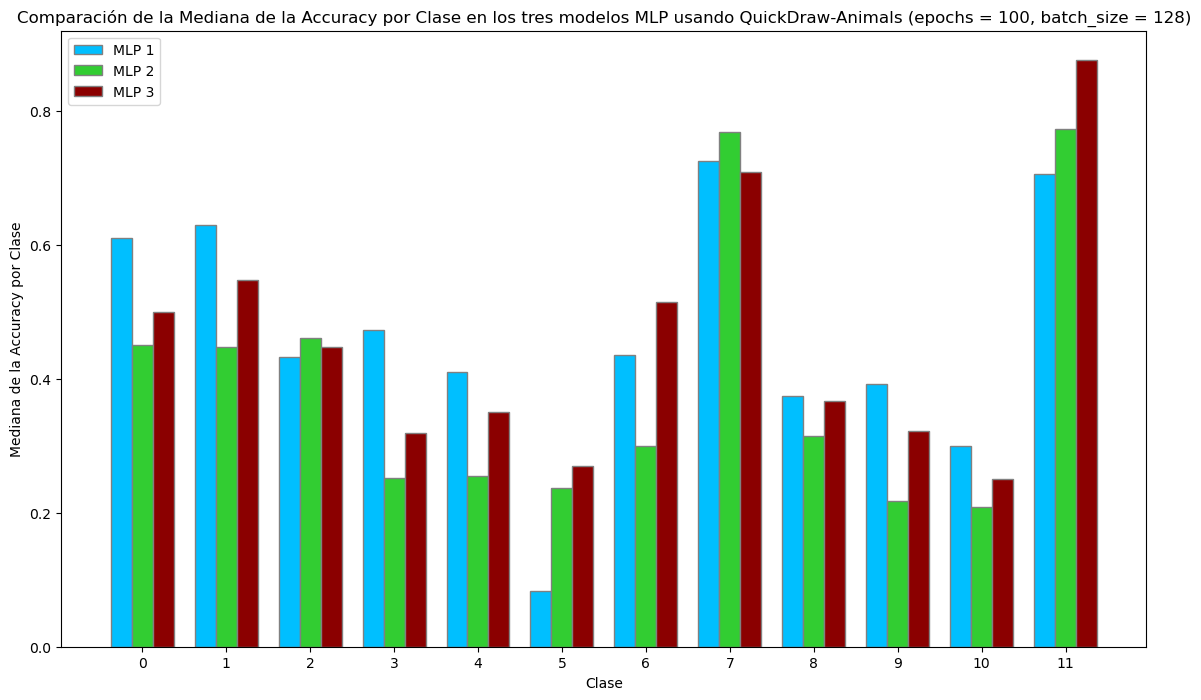

In [69]:
# Se crea un gráfico de barras que compara los valores de la Mediana de la Accuracy por Clase de cada modelo MLP
createAccuracyPlot(median_class_accuracies_mlp1, median_class_accuracies_mlp2, median_class_accuracies_mlp3, 'Clase', 
                   'Mediana de la Accuracy por Clase', 
                'Comparación de la Mediana de la Accuracy por Clase en los tres modelos MLP usando QuickDraw-Animals (epochs = 100, batch_size = 128)',
                   range(0,12))

<h2>Modificación de configuraciones del modelo</h2>

Similar a QuickDraw-10, se harán las siguientes pruebas:

* Cambiar la función de perdida de los modelos
* Cambiar las funciones de activación de los modelos
* Duplicar el número de neuronas

<h3>Modificación de Función de Perdida a Categorical Cross-Entropy en Modelo MLP 1 usando QuickDraw-Animals</h3>
Para el modelo MLP 1, se cambia la función de pérdida de Sparse Categorical Cross-Entropy a Categorical Cross-Entropy. Se puede ver que no hay cambios en el valor de la mediana de la accuracy total, pero si hay una gran pérdida de accuracy total y de clase en la iteración 3.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.0659 - loss: 2.4671 
Iteración 0 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 0 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.0659 - loss: 2.4667   
Iteración 1 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.0659 - loss: 2.4671 
Iteración 2 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 2 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.0659 - loss: 2.4671 
Iteración 3 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 3 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.0659 - loss: 2.4669 
Iteración 4 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 4 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]
-------------------------------------



C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


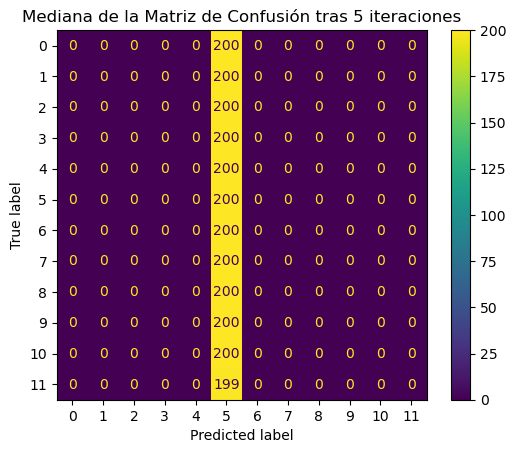

Mediana de la Accuracy por Clase en 5 Iteraciones: [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]
Mediana de la Accuracy Total en 5 Iteraciones: 0.0834


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:67: RuntimeWarning: All-NaN slice encountered
  median_class_accuracies = np.nanmedian(class_accuracies, axis=0)


In [70]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-Animals. 
# Se cambia la función de pérdida a Categorical Cross-Entropy
results_mlp1FP, median_mlp1FP, median_class_accuracies_mlp1FP = trainAndEvaluate(1, X_train, y_train, X_test, y_test,  
                                                                                 ['relu','sigmoid'], 'categorical_crossentropy',[128,64])

<h3>Modificación de Función de Perdida a Sparse Categorical Cross-Entropy en Modelo MLP 2 usando QuickDraw-Animals</h3>
Para el modelo MLP 2, se cambia la función de pérdida de Categorical Cross-Entropy a Sparse Categorical Cross-Entropy. Se puede ver que hay un descenso en el valor de la mediana de la accuracy total, pasando de 0,3618 a 0,3435.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3814 - loss: 1.8141
Iteración 0 - Accuracy Total: 0.34347644448280334
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 0 : [0.35973597 0.3740458  0.44736842 0.24186047 0.21212121 0.20689655
 0.25862069 0.72839506 0.2244898  0.20606061 0.19402985 0.8255814 ]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4115 - loss: 1.7843
Iteración 1 - Accuracy Total: 0.3814089298248291
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 1 : [0.35243553 0.4057971  0.4742268  0.24509804 0.22891566 0.25914634
 0.31391586 0.5        0.42028986 0.29090909 0.22077922 0.78606965]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2832 - loss: 2.1390
Iteración 2 - Accuracy Total: 0.3172155022621155
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 2 : [0.5308642  0.62857143 0.35447761 0.32967033 0.25906736 0.16574586
 0.57142857 0.975      0.31034483 0.28888889 0.16145833 

C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


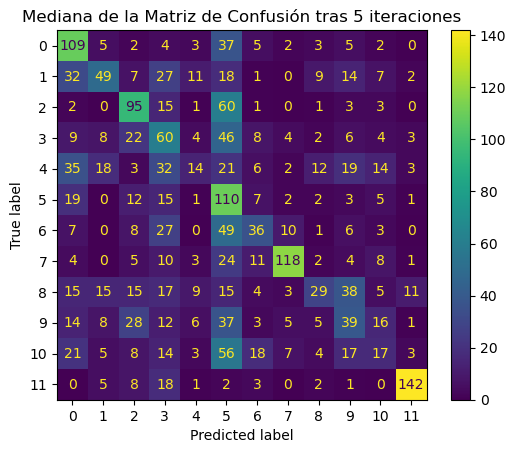

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.3656265  0.38992145 0.44762243 0.24186047 0.24399151 0.22046955
 0.38489911 0.73607253 0.36531734 0.26477639 0.20740454 0.8247078 ]
Mediana de la Accuracy Total en 5 Iteraciones: 0.3435


In [71]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-Animals. 
# Se cambia la función de pérdida a Sparse Categorical Cross-Entropy
results_mlp2FP, median_mlp2FP, median_class_accuracies_mlp2FP = trainAndEvaluate(2, X_train, y_train, X_test, y_test,  
                                                                                  ['relu','relu', 'relu'], 'sparse_categorical_crossentropy', 
                                                                                 [256, 256, 256])

<h3>Modificación de Función de Perdida a Sparse Categorical Cross-Entropy en Modelo MLP 3 usando QuickDraw-Animals</h3>
Para el modelo MLP 3, se cambia la función de pérdida de Categorical Cross-Entropy a Sparse Categorical Cross-Entropy. Se puede ver que hay un leve aumento en el valor de la mediana de la accuracy total, pasando de 0,4406 a 0,4506.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3431 - loss: 1.9945
Iteración 0 - Accuracy Total: 0.39683201909065247
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.64197531 0.52702703 0.41916168 0.35151515 0.25373134 0.29591837
 0.63855422 0.7032967  0.24067797 0.22625698 0.26315789 0.74311927]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4621 - loss: 1.7145
Iteración 1 - Accuracy Total: 0.45227178931236267
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.56741573 0.47368421 0.44728435 0.42857143 0.37654321 0.33482143
 0.52980132 0.83561644 0.28619529 0.27946128 0.21153846 0.71084337]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4774 - loss: 1.6444
Iteración 2 - Accuracy Total: 0.4506044089794159
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.50638298 0.51333333 0.50840336 0.41954023 0.34008097 0.26648352
 0.49056604 0.88135593 0.40268456 0.33333333 0.28333333

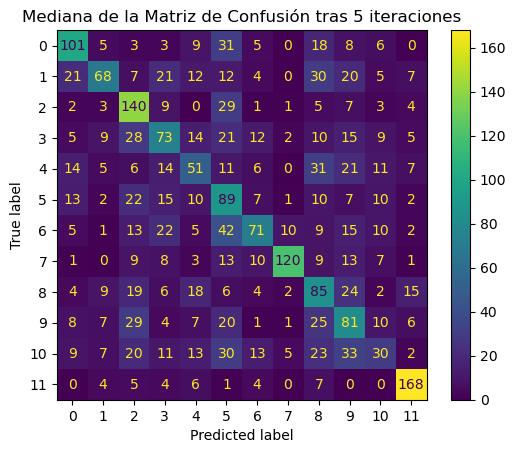

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.56470588 0.52702703 0.44728435 0.35151515 0.37313433 0.29591837
 0.49305556 0.83561644 0.3359375  0.33333333 0.22580645 0.75675676]
Mediana de la Accuracy Total en 5 Iteraciones: 0.4506


In [72]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-Animals
# Se cambia la función de pérdida a Sparse Categorical Cross-Entropy
results_mlp3FP, median_mlp3FP, median_class_accuracies_mlp3FP = trainAndEvaluate(3, X_train, y_train, X_test, y_test, 
                                                                        ['relu','relu', 'relu', 'relu'], 'sparse_categorical_crossentropy',
                                                                           [512, 256, 128, 64])

Se puede ver que cambiar la función de pérdida influye muy poco en la mediana de la accuracy total, con el primer modelo no teniendo cambios (pero si cambia la accuracy de una iteración), el segundo disminuyendo levemente su accuracy y el tercero aumentandola levemente.

<h3>Modificación de Función de Activación de Sigmoid a ELU en Modelo MLP 1 usando QuickDraw-Animals</h3>
Para el modelo MLP 1, se realiza un cambio de la segunda función de activación, pasando de Sigmoid a ELU. Se puede ver un aumento notable de la mediana de la accuracy total, pasando de 0,834 a 0,4427.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.4811 - loss: 1.7084
Iteración 0 - Accuracy Total: 0.47936639189720154
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 0 : [0.64285714 0.6015625  0.44267516 0.4223301  0.45588235 0.36480687
 0.5        0.72674419 0.50862069 0.34666667 0.22651934 0.65168539]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.4466 - loss: 1.7026
Iteración 1 - Accuracy Total: 0.44268444180488586
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 1 : [0.525      0.592      0.47368421 0.39215686 0.37662338 0.23413567
 0.44808743 0.8125     0.34322034 0.40571429 0.27205882 0.85795455]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.4687 - loss: 1.7085
Iteración 2 - Accuracy Total: 0.44226759672164917
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 2 : [0.51741294 0.45918367 0.53225806 0.3        0.33170732 0.29180328
 0.35664336 0.76623377 0.38121547 0.561643

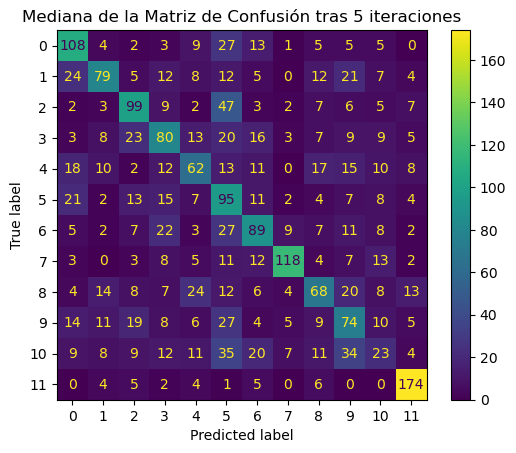

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.51741294 0.54140127 0.52121212 0.4223301  0.37662338 0.29180328
 0.44808743 0.76623377 0.40186916 0.35714286 0.25555556 0.75213675]
Mediana de la Accuracy Total en 5 Iteraciones: 0.4427


In [73]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-Animals. 
# Se cambia la segunda función de activación a ELU.
results_mlp1RE, median_mlp1RE, median_class_accuracies_mlp1RE = trainAndEvaluate(1, X_train, y_train, X_test, y_test,  
                                                                                 ['relu','elu'], 'sparse_categorical_crossentropy',[128,64])

<h3>Modificación de Función de Activación 2 y 3 de ReLU a Elu en Modelo MLP 2 usando QuickDraw-Animals</h3>
Para el modelo MLP 2, se realizan cambios en la función de activación 2 y 3, ambas pasando de ReLU a ELU. Sorprendentemente, disminuye considerablemente la  mediana de la accuracy total, pasando de 0,3618 a 0,1888.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1804 - loss: 2.3302
Iteración 0 - Accuracy Total: 0.1909128874540329
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.13888889 0.1624714         nan        nan        nan 0.1477707
        nan        nan 0.07142857 0.13802083        nan 0.53924915]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1849 - loss: 2.3099
Iteración 1 - Accuracy Total: 0.18716131150722504
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 1 : [0.13994169 0.1691974         nan        nan        nan 0.13278008
        nan        nan 0.11428571 0.125             nan 0.56554307]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0659 - loss: 2.4753 
Iteración 2 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 2 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1513 - loss: 2.3398
Iteración 3 - Accuracy Total: 0.18882867693901062
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 3 : [0.14649682 0.16205534        nan        nan        nan 0.14689266
        nan        nan 0.10218978 0.11631944        nan 0.51746032]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1861 - loss: 2.2738
Iteración 4 - Accuracy Total: 0.21008753776550293
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 4 : [0.30120482        nan 0.18584071 0.11340206        nan 0.13685848
        nan 0.14940022 0.07526882        nan        nan 0.57491289]
-------------------------------------



C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


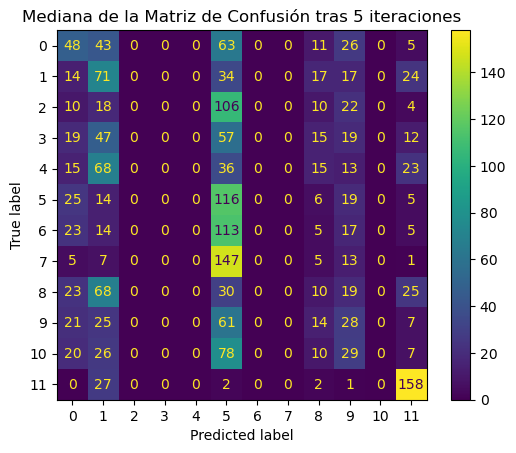

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.14321925 0.1624714  0.18584071 0.11340206        nan 0.13685848
        nan 0.14940022 0.0887293  0.125             nan 0.55239611]
Mediana de la Accuracy Total en 5 Iteraciones: 0.1888


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:67: RuntimeWarning: All-NaN slice encountered
  median_class_accuracies = np.nanmedian(class_accuracies, axis=0)


In [74]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-Animals
# Se cambia la función de activación 2 y 3 a ELU
results_mlp2RE, median_mlp2RE, median_class_accuracies_mlp2RE = trainAndEvaluate(2, X_train, y_train, X_test, y_test, 
                                                                          ['relu','elu', 'elu'], 'categorical_crossentropy', [256, 256, 256])

<h3>Modificación de Función de Activación 1 y 3 de ReLU a Elu en Modelo MLP 3 usando QuickDraw-Animals</h3>
Para el modelo MLP 3, se realizan cambios en la función de activación 1 y 3, ambas pasando de ReLU a ELU. Se puede ver una disminución de la mediana de la accuracy total, pasando de 0,4406 a 0,4123

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4569 - loss: 1.7539
Iteración 0 - Accuracy Total: 0.45560649037361145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [0.47325103 0.62025316 0.49792531 0.32905983 0.34817814 0.33088235
 0.45751634 0.80536913 0.36329588 0.44303797 0.21666667 0.73305085]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4604 - loss: 1.6888
Iteración 1 - Accuracy Total: 0.4285118877887726
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.50218341 0.53896104 0.48638132 0.37704918 0.375      0.2629108
 0.41463415 0.69005848 0.359447   0.44186047 0.184      0.91851852]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4443 - loss: 1.7391
Iteración 2 - Accuracy Total: 0.41225510835647583
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [0.49553571 0.48993289 0.433213   0.41481481 0.38172043 0.21326165
 0.58461538 0.85833333 0.34814815 0.34934498 0.20238095 

C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


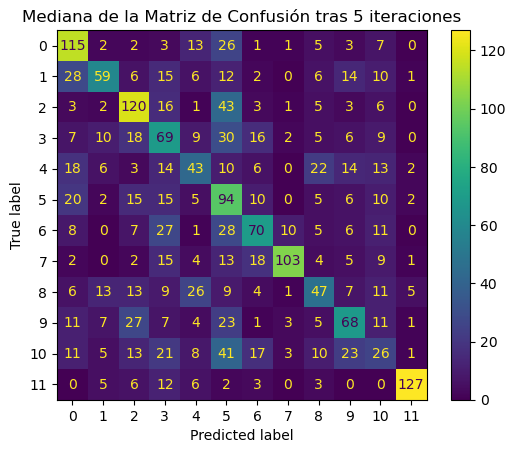

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.48439337 0.51444696 0.49215332 0.32905983 0.37836022 0.26808331
 0.44304388 0.83185123 0.36137144 0.39560272 0.20002769 0.88868464]
Mediana de la Accuracy Total en 5 Iteraciones: 0.4123


In [75]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-Animals
# Se cambia la función de activación 1 y 3 a ELU
results_mlp3R3, median_mlp3RE, median_class_accuracies_mlp3RE = trainAndEvaluate(3, X_train, y_train, X_test, y_test, 
                                                                        ['elu','relu', 'elu', 'relu'], 'categorical_crossentropy',[512, 256, 128, 64])

Se puede ver que solo el modelo MLP 1 se ve beneficiado al cambiar la Función de Activación Sigmoid por ELU. Mientras que los modelos MLP 2 y MLP 3 se ven perjudicados al cambiar funciones ReLU por ELU, dando a entender que para QuickDraw-Animals la mejor Función de Activación es ReLU.

<h3>Modificación de Número de Neuronas al doble en Modelo MLP1 usando QuickDraw-Animals</h3>
Para el modelo MLP 1, se aumenta el número de neuronas de 128 y 64 a 256 y 128 respectivamente. Se puede ver que la mediana de la accuracy no cambia, manteniendose en 0,834.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0659 - loss: 2.4517  
Iteración 0 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy por cada clase en Iteración 0 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.0659 - loss: 2.4551 
Iteración 1 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 1 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.0659 - loss: 2.4546 
Iteración 2 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 2 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.0659 - loss: 2.4568 
Iteración 3 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 3 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0659 - loss: 2.4562  
Iteración 4 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy por cada clase en Iteración 4 : [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]
-------------------------------------



C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


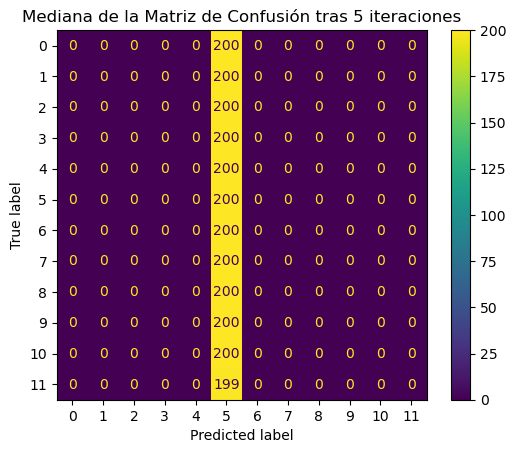

Mediana de la Accuracy por Clase en 5 Iteraciones: [       nan        nan        nan        nan        nan 0.08336807
        nan        nan        nan        nan        nan        nan]
Mediana de la Accuracy Total en 5 Iteraciones: 0.0834


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:67: RuntimeWarning: All-NaN slice encountered
  median_class_accuracies = np.nanmedian(class_accuracies, axis=0)


In [76]:
# Se obtienen los resultados del primer modelo MLP de dos capas ocultas usando QuickDraw-Animals.
# Se cambian el número de neuronas a 256 y 128 (doble de las originales).
results_mlp1NN, median_mlp1NN, median_class_accuracies_mlp1NN = trainAndEvaluate(1, X_train, y_train, X_test, y_test,  
                                                                                 ['relu','sigmoid'], 'sparse_categorical_crossentropy',[256,128])

<h3>Modificación de Número de Neuronas al doble en Modelo MLP 2 usando QuickDraw-Animals</h3>
Para el modelo MLP 2, se aumenta el número de neuronas de 256 a 512 en todas las capas ocultas. Se puede ver que la mediana de la accuracy total disminuye de 0,3618 a 0,1938.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1033 - loss: 2.4856 
Iteración 0 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 0 : [       nan        nan        nan 0.08336807        nan        nan
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1223 - loss: 2.3601
Iteración 1 - Accuracy Total: 0.19383075833320618
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 1 : [0.0982906  0.19105691        nan        nan        nan 0.08888889
        nan 0.17309698 0.16115702 0.12873134        nan 0.8540146 ]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1033 - loss: 2.4856 
Iteración 2 - Accuracy Total: 0.08336807042360306
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 2 : [       nan        nan        nan 0.08336807        nan        nan
        nan        nan        nan        nan        nan        nan]


C:\Users\johns\AppData\Local\Temp\ipykernel_23884\3374301334.py:55: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=0)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3739 - loss: 1.8731
Iteración 3 - Accuracy Total: 0.3676531910896301
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 3 : [0.46808511 0.52873563 0.40074906 0.22488038 0.25401929 0.2160149
 0.56666667 0.98571429 0.25498008 0.38947368 0.20481928 0.76303318]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3849 - loss: 1.8788
Iteración 4 - Accuracy Total: 0.3693205416202545
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy por cada clase en Iteración 4 : [0.50561798 0.41121495 0.34924623 0.25559105 0.3255814  0.23631841
 0.35802469 0.63861386 0.275      0.22413793 0.20325203 0.78      ]
-------------------------------------



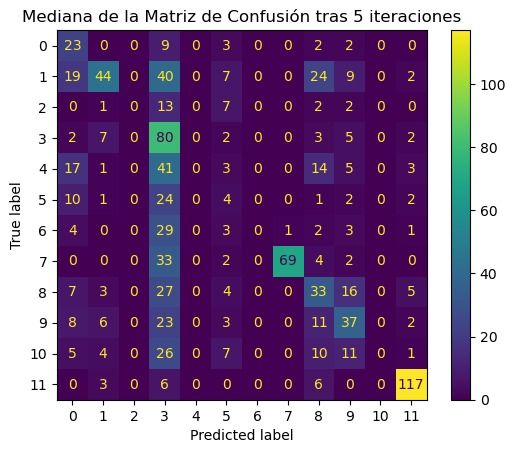

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.46808511 0.41121495 0.37499765 0.15412423 0.28980034 0.2160149
 0.46234568 0.63861386 0.25498008 0.22413793 0.20403565 0.78      ]
Mediana de la Accuracy Total en 5 Iteraciones: 0.1938


In [77]:
# Se obtienen los resultados del segundo modelo MLP de tres capas ocultas usando QuickDraw-Animals
# Se cambia el número de neuronas a 512 (doble de las originales)
results_mlp2NN, median_mlp2NN, median_class_accuracies_mlp2NN = trainAndEvaluate(2, X_train, y_train, X_test, y_test, 
                                                                          ['relu','relu', 'relu'], 'categorical_crossentropy', [512, 512, 512])

<h3>Modificación de Número de Neuronas al doble en Modelo MLP 3 usando QuickDraw-Animals</h3>
Para el modelo MLP 3, se aumenta el número de neuronas de 512, 256, 128 y 64 a 1024, 512, 256 y 128 respectivamente. Se puede ver que la mediana de la accuracy disminuye, cambiando de 0,4406 a 0,3910.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4334 - loss: 1.7739
Iteración 0 - Accuracy Total: 0.41850772500038147
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 0 : [0.39322034 0.41221374 0.44       0.31707317 0.35766423 0.3032491
 0.40776699 0.68817204 0.36434109 0.27169811 0.25252525 0.73191489]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3919 - loss: 1.8857
Iteración 1 - Accuracy Total: 0.38766151666641235
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 1 : [0.44782609 0.29644269 0.45660377 0.22857143 0.29032258 0.34131737
 0.53333333 0.56972112 0.26200873 0.21516393 0.20754717 0.79792746]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4369 - loss: 1.7608
Iteración 2 - Accuracy Total: 0.41975823044776917
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy por cada clase en Iteración 2 : [0.52631579 0.37341772 0.50731707 0.38410596 0.26315789 0.28947368
 0.48765432 0.70053476 0.28015564 0.33802817 0.23584906

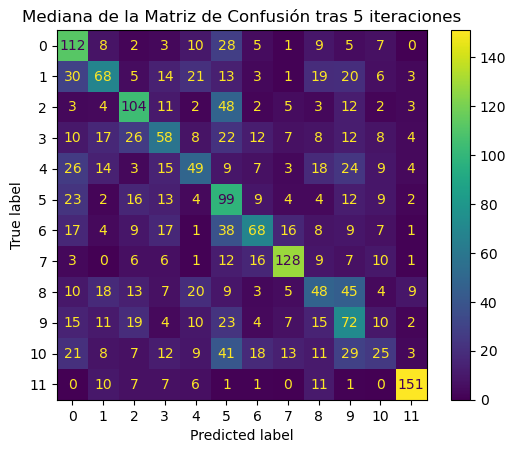

Mediana de la Accuracy por Clase en 5 Iteraciones: [0.39322034 0.37341772 0.45945946 0.31707317 0.26315789 0.28947368
 0.43037975 0.68817204 0.28015564 0.27169811 0.23584906 0.79792746]
Mediana de la Accuracy Total en 5 Iteraciones: 0.3910


In [78]:
# Se obtienen los resultados del tercer modelo MLP de cuatro capas ocultas usando QuickDraw-Animals
# Se cambia el número de neuronas a 1024, 512, 256 y 128 (doble de las originales).
results_mlp3NN, median_mlp3NN, median_class_accuracies_mlp3NN = trainAndEvaluate(3, X_train, y_train, X_test, y_test, 
                                                                        ['relu','relu', 'relu', 'relu'], 'categorical_crossentropy',
                                                                                 [1024, 512, 256, 128])

De los resultados anteriores se desprende que el aumento de neuronas en los modelos MLP no trae beneficios cuando se utiliza QuickDraw-Animals, manteniendo la mediana de la accuracy total en el modelo MLP 1 y disminuyendo la mediana en los modelos MLP 2 y 3.

Los analisis relacionados a los resultados se realizan en el informe escrito que acompaña a este código. En él, se revisa el desempeño de los modelos y cuales son las ventajas, desventajas y diferencias que existen entre los modelos y sus configuraciones, entre otros aspectos.